In [1]:
python_material_folder_name = "python-material"

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    path_python_material = "/Users/Andriy.Bespalyy/Desktop/data_sc/the_project/python-material-20240919-DSIF4 & DSIF5/python-material/"
except:
    print ("correct the path")
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    

df = pd.read_csv(f"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")
#df.head()

Lets have a look at the initial dataset:

In [2]:
df.shape

(100000, 143)

In [3]:
df.head()

Unnamed: 0.1  Unnamed: 0         id  loan_amnt  funded_amnt  \
0       1746494       25450  167338079    4000.00      4000.00   
1       2370717       81861   71016917   24000.00     24000.00   
2       2264870      397109   39589826    5000.00      5000.00   
3        595422       15492  134798709   24000.00     24000.00   
4        562657       90591  127097355   14000.00     14000.00   

   funded_amnt_inv        term int_rate  installment grade sub_grade  \
0          4000.00   36 months   13.08%       134.93     B        B5   
1         24000.00   60 months    9.16%       500.07     B        B2   
2          5000.00   36 months   10.49%       162.49     B        B3   
3         24000.00   60 months   11.05%       522.42     B        B4   
4         14000.00   60 months   13.59%       322.79     C        C2   

        emp_title emp_length home_ownership  annual_inc verification_status  \
0         cashier  10+ years       MORTGAGE    48000.00     Source Verified   
1             ABM    6 years           RENT    57000.00     Source Verified   
2          driver  10+ years       MORTGAGE    55000.00        Not Verified   
3             NaN        NaN       MORTGAGE    43500.00        Not Verified   
4  Shipping Clerk  10+ years       MORTGAGE    48000.00     Source Verified   

    issue_d loan_status pymnt_plan  \
0  Mar-2020     Current          n   
1  Feb-2016     Current          n   
2  Jan-2015  Fully Paid          n   
3  Jun-2018     Current          n   
4  Jan-2018  Fully Paid          n   

                                                 url             purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...    home_improvement   
1  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
2  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
3  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
4  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   

                     title zip_code addr_state   dti  delinq_2yrs  \
0         Home improvement    115xx         NY 20.25         1.00   
1  Credit card refinancing    708xx         LA 25.33         0.00   
2  Credit card refinancing    347xx         FL  7.22         0.00   
3       Debt consolidation    443xx         OH 24.55         0.00   
4       Debt consolidation    681xx         NE 24.30         0.00   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0         Dec-2004          665.00           669.00            0.00   
1         Jan-2004          680.00           684.00            0.00   
2         Apr-2010          665.00           669.00            0.00   
3         Oct-2005          750.00           754.00            0.00   
4         Apr-2008          735.00           739.00            1.00   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                   19.00                  110.00      4.00     1.00   
1                     NaN                     NaN     10.00     0.00   
2                     NaN                   61.00      7.00     1.00   
3                     NaN                     NaN     15.00     0.00   
4                     NaN                     NaN     16.00     0.00   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0    1988.00      82.8%      12.00                   w    3816.34   
1   22697.00      64.5%      24.00                   w    4333.29   
2    6001.00      52.6%       9.00                   f       0.00   
3    6573.00      12.1%      23.00                   w   16317.69   
4   11894.00      27.1%      23.00                   w       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34       266.95           266.95           183.66   
1        4333.29     25496.16         25496.16         19666.71   
2           0.00      5846.67          5846.67          5000.00   
3       16317.69     12000.93         12000.93        

In [4]:
duplicates = df.duplicated().sum()
duplicates

0

In [5]:
list_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'zip_code', 'url']

In [6]:
df = df.drop(list_to_drop, axis = 1)

In [7]:
df.shape

(100000, 138)

we dropped the sensitive and unique-like columns, we will not use in our analysis

Lets check the columns with NA values

In [8]:
nan_columns = df.columns[df.isna().any()]
nan_columns

Index(['emp_title', 'emp_length', 'title', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', '

As wee see there is a huge number of data with Nan, lets split these by data types, and at first, deal with categories

In [9]:
df.dtypes[:5]

loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term                object
int_rate            object
dtype: object

In [10]:
nan_obj_columns = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isna().any()]
nan_obj_columns


Index(['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status'],
      dtype='object')

Lets process the ones that cannot be simply renamed ad not-defined

In [11]:
df['verification_status'] = df['verification_status'].replace('Source Verified', 'Verified', )
df['verification_status'] = df['verification_status'].replace('Verified', 1)
df['verification_status'] = df['verification_status'].replace('Not Verified', 0)
df['verification_status'] = df['verification_status'].astype(int)
#df['verification_status'].value_counts().plot(kind='barh')
df['emp_length'] = df['emp_length'].str.strip('+years')
df['emp_length'] = df['emp_length'].str.strip('<')
df['emp_length'] = df['emp_length'].str.strip('+ ')
df['emp_length'] = df['emp_length'].astype(float)
df['emp_length'].head()
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mean())
#df['emp_length'].value_counts().plot(kind='barh')
df['revol_util'] = df['revol_util'].astype(str)
df['revol_util'] = df['revol_util'].str.strip('%')
df['revol_util'] = df['revol_util'].astype(float)
#df['revol_util'].head()
#df['hardship_status'].value_counts().plot(kind='barh')
df['hardship_status'] = df['hardship_status'].replace('COMPLETE', 'COMPLETED')

C:\Users\Andriy.Bespalyy\AppData\Local\Temp\ipykernel_36056\3657792777.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status'] = df['verification_status'].replace('Not Verified', 0)


In [12]:
#Lets jump to categories with object datatype
nan_obj_columns = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isna().any()]
nan_obj_columns

Index(['emp_title', 'title', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status'],
      dtype='object')

In [13]:
df['verification_status_joint'] = df['verification_status_joint'].fillna('Not verified')

In [14]:
df['hardship_status'] = df['hardship_status'].fillna('NOT ACTIVE')

In [15]:
df['hardship_loan_status'] = df['hardship_loan_status'].fillna('NOT ACTIVE')

In [16]:
df['hardship_flag'] = df['hardship_flag'].fillna('N')
df['hardship_type']=df['hardship_type'].fillna('Not specified/Irrelevant')

In [17]:
nan_obj_columns = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isna().any()]
nan_obj_columns

Index(['emp_title', 'title', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'sec_app_earliest_cr_line', 'hardship_reason',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date'],
      dtype='object')

In [18]:
df['emp_title'] =  df['emp_title'].fillna('Not specified')
df['hardship_reason'] = df['hardship_reason'].fillna('Not specified/Irrelevant')


In [19]:
df['title'] = df['title'].fillna('Other')

In [20]:
nan_obj_columns = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isna().any()]
nan_obj_columns

Index(['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'sec_app_earliest_cr_line', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date'],
      dtype='object')

In [21]:
df.loc[df['hardship_start_date'].isna(), 'hardship_start_date'] = pd.Timestamp("1970-01-01")
df.loc[df['hardship_end_date'].isna(), 'hardship_end_date'] = pd.Timestamp("1970-01-01")
df.loc[df['payment_plan_start_date'].isna(), 'payment_plan_start_date'] = pd.Timestamp("1970-01-01")
df.loc[df['last_pymnt_d'].isna(), 'last_pymnt_d'] = pd.Timestamp("1970-01-01")
df.loc[df['next_pymnt_d'].isna(), 'next_pymnt_d'] = pd.Timestamp("1970-01-01")
df.loc[df['last_credit_pull_d'].isna(), 'last_credit_pull_d'] = pd.Timestamp("1970-01-01")
df.loc[df['sec_app_earliest_cr_line'].isna(), 'sec_app_earliest_cr_line'] = pd.Timestamp("1970-01-01")



In [22]:
nan_obj_columns = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isna().any()]
nan_obj_columns

Index([], dtype='object')

Let proceed with float type

In [23]:
nan_obj_columns = df.select_dtypes(include='float64').columns[df.select_dtypes(include='float64').isna().any()]
nan_obj_columns

Index(['dti', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'nu

Lets process the balance like columns, which we can replace Nans with 0

In [24]:
fill_zero_cols = [
    'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
    'open_act_il', 'open_il_12m', 'open_il_24m',
    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
    'all_util', 'inq_fi', 'total_cu_tl', 'acc_open_past_24mths',
    'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
    'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
    'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
    'inq_last_12m', 'pub_rec_bankruptcies', 'tax_liens', 'num_accts_ever_120_pd', 'chargeoff_within_12_mths','collections_12_mths_ex_med'
]
df[fill_zero_cols] = df[fill_zero_cols].fillna(0)

Lets process the relative -like columns, in which the median values may be replace with median

In [25]:
fill_median_cols = [
    'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'revol_util',
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
    'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
    'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
    'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim'
]
df[fill_median_cols] = df[fill_median_cols].apply(lambda x: x.fillna(x.median()))

In [26]:
nan_obj_columns = df.select_dtypes(include='float64').columns[df.select_dtypes(include='float64').isna().any()]
nan_obj_columns
#print(f"Number of columns: {len(df[nan_obj_columns].columns)}")

Index(['dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'mths_since_rcnt_il', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'deferral_term',
       'hardship_amount', 'hardship_length', 'hardship_dpd',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')

Removing the columns with the majority of empty values

In [27]:
threshold = 0.5 # Customisable
null_percentages = df.select_dtypes(include='float64').isnull().mean()
df = df.drop(columns=null_percentages[null_percentages > threshold].index)
print(f"Dropped columns: {null_percentages[null_percentages > threshold].index.tolist()}")

Dropped columns: ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount']


In [28]:
nan_obj_columns = df.select_dtypes(include='float64').columns[df.select_dtypes(include='float64').isna().any()]
nan_obj_columns
#print(f"Number of columns: {len(df[nan_obj_columns].columns)}")

Index(['dti', 'mths_since_rcnt_il'], dtype='object')

In [29]:
fill_nine_cols = [
     'mths_since_rcnt_il'
]
# Apply fill with 999
df[fill_nine_cols] = df[fill_nine_cols].fillna(999)

In [30]:
df['dti'] = df['dti'].fillna(df['installment']/df['annual_inc']/12)
df["dti"] = df["dti"].replace(np.inf, 999)

In [31]:
#Lets check the existence of NaN values in the processed dataset
df.columns[df.isna().any()]


Index([], dtype='object')

In [32]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0    4000.00      4000.00          4000.00   36 months   13.08%       134.93   
1   24000.00     24000.00         24000.00   60 months    9.16%       500.07   
2    5000.00      5000.00          5000.00   36 months   10.49%       162.49   
3   24000.00     24000.00         24000.00   60 months   11.05%       522.42   
4   14000.00     14000.00         14000.00   60 months   13.59%       322.79   

  grade sub_grade       emp_title  emp_length home_ownership  annual_inc  \
0     B        B5         cashier       10.00       MORTGAGE    48000.00   
1     B        B2             ABM        6.00           RENT    57000.00   
2     B        B3          driver       10.00       MORTGAGE    55000.00   
3     B        B4   Not specified        5.92       MORTGAGE    43500.00   
4     C        C2  Shipping Clerk       10.00       MORTGAGE    48000.00   

   verification_status   issue_d loan_status pymnt_plan             purpose  \
0                    1  Mar-2020     Current          n    home_improvement   
1                    1  Feb-2016     Current          n         credit_card   
2                    0  Jan-2015  Fully Paid          n         credit_card   
3                    0  Jun-2018     Current          n  debt_consolidation   
4                    1  Jan-2018  Fully Paid          n  debt_consolidation   

                     title addr_state   dti  delinq_2yrs earliest_cr_line  \
0         Home improvement         NY 20.25         1.00         Dec-2004   
1  Credit card refinancing         LA 25.33         0.00         Jan-2004   
2  Credit card refinancing         FL  7.22         0.00         Apr-2010   
3       Debt consolidation         OH 24.55         0.00         Oct-2005   
4       Debt consolidation         NE 24.30         0.00         Apr-2008   

   fico_range_low  fico_range_high  inq_last_6mths  open_acc  pub_rec  \
0          665.00           669.00            0.00      4.00     1.00   
1          680.00           684.00            0.00     10.00     0.00   
2          665.00           669.00            0.00      7.00     1.00   
3          750.00           754.00            0.00     15.00     0.00   
4          735.00           739.00            1.00     16.00     0.00   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0    1988.00       82.80      12.00                   w    3816.34   
1   22697.00       64.50      24.00                   w    4333.29   
2    6001.00       52.60       9.00                   f       0.00   
3    6573.00       12.10      23.00                   w   16317.69   
4   11894.00       27.10      23.00                   w       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34       266.95           266.95           183.66   
1        4333.29     25496.16         25496.16         19666.71   
2           0.00      5846.67          5846.67          5000.00   
3       16317.69     12000.93         12000.93          7682.31   
4           0.00     16605.68         16605.68         14000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0          83.29                0.00        0.00                     0.00   
1        5829.45                0.00        0.00                     0.00   
2         846.67                0.00        0.00                     0.00   
3        4318.62                0.00        0.00                     0.00   
4        2605.68                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt         next_pymnt_d last_credit_pull_d  \
0     May-2020           134.93             Jun-2020           May-2020   
1     May-2020           500.07             Jun-2020           May-2020   
2     Jan-2018           162.43  1970-01-01 00:00:00           May-2020   
3     May-2020           522.42             Jun-2020           May-2020   
4     Jul-2019         111

In [33]:
df.shape

(100000, 113)

In [34]:
df.dtypes[:10]

loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term                object
int_rate            object
installment        float64
grade               object
sub_grade           object
emp_title           object
emp_length         float64
dtype: object

In [35]:
# as we can see, the critical parameters here stored as object, lets change it 
df['int_rate_clean'] = df['int_rate'].str.rstrip('%').astype('float')
df['int_rate_clean'] = df['int_rate_clean']/100
df['term_clean'] = df['term'].str.rstrip('months').astype('int')

In [36]:
#Lets see the general stats info as per dataset
df.describe()

loan_amnt  funded_amnt  funded_amnt_inv  installment  emp_length  \
count  100000.00    100000.00        100000.00    100000.00   100000.00   
mean    15332.37     15328.22         15313.24       451.71        5.92   
std      9468.19      9467.42          9470.92       273.02        3.48   
min       700.00       700.00             0.00        22.51        1.00   
25%      8000.00      8000.00          8000.00       253.06        2.00   
50%     13000.00     13000.00         13000.00       380.81        5.92   
75%     20000.00     20000.00         20000.00       602.30       10.00   
max     40000.00     40000.00         40000.00      1719.83       10.00   

       annual_inc  verification_status       dti  delinq_2yrs  fico_range_low  \
count   100000.00            100000.00 100000.00    100000.00       100000.00   
mean     80029.18                 0.64     20.30         0.28          700.64   
std      87224.34                 0.48     35.32         0.82           33.80   
min          0.00                 0.00     -1.00         0.00          640.00   
25%      47160.50                 0.00     12.07         0.00          675.00   
50%      66000.00                 1.00     18.11         0.00          695.00   
75%      95000.00                 1.00     24.90         0.00          720.00   
max   10999200.00                 1.00    999.00        18.00          845.00   

       fico_range_high  inq_last_6mths  open_acc   pub_rec  revol_bal  \
count        100000.00       100000.00 100000.00 100000.00  100000.00   
mean            704.64            0.55     11.69      0.18   16893.49   
std              33.80            0.86      5.75      0.55   22398.29   
min             644.00            0.00      0.00      0.00       0.00   
25%             679.00            0.00      8.00      0.00    5973.75   
50%             699.00            0.00     11.00      0.00   11465.00   
75%             724.00            1.00     15.00      0.00   20566.25   
max             850.00           25.00     86.00     52.00 1107809.00   

       revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count   100000.00  100000.00  100000.00      100000.00    100000.00   
mean        48.89      24.04    4032.02        4031.44     12559.49   
std         24.89      12.06    7465.24        7464.71     10337.36   
min          0.00       1.00       0.00           0.00         0.00   
25%         29.60      15.00       0.00           0.00      4744.56   
50%         48.50      22.00       0.00           0.00      9767.65   
75%         68.00      31.00    5315.21        5314.93     17567.37   
max        175.00     115.00   40000.00       40000.00     66775.52   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count        100000.00        100000.00      100000.00           100000.00   
mean          12544.53          9911.41        2479.31                1.75   
std           10333.63          8669.89        2766.02               13.42   
min               0.00             0.00           0.00                0.00   
25%            4732.01          3113.81         724.00                0.00   
50%            9751.74          7415.48        1537.72                0.00   
75%           17540.21         14500.00        3175.68                0.00   
max           66775.52         40000.00       31714.37              819.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count   100000.00                100000.00        100000.00   
mean       167.02                    28.61          3512.91   
std        808.29                   143.59          6189.95   
min          0.00                     0.00          -753.18   
25%          0.00                     0.00           264.60   
50%          0.00                     0.00           584.09   
75%          0.00                     0.00          3979.38   
max      25037.33                  4821.78         41557.18   

       last_fico_range_high  las

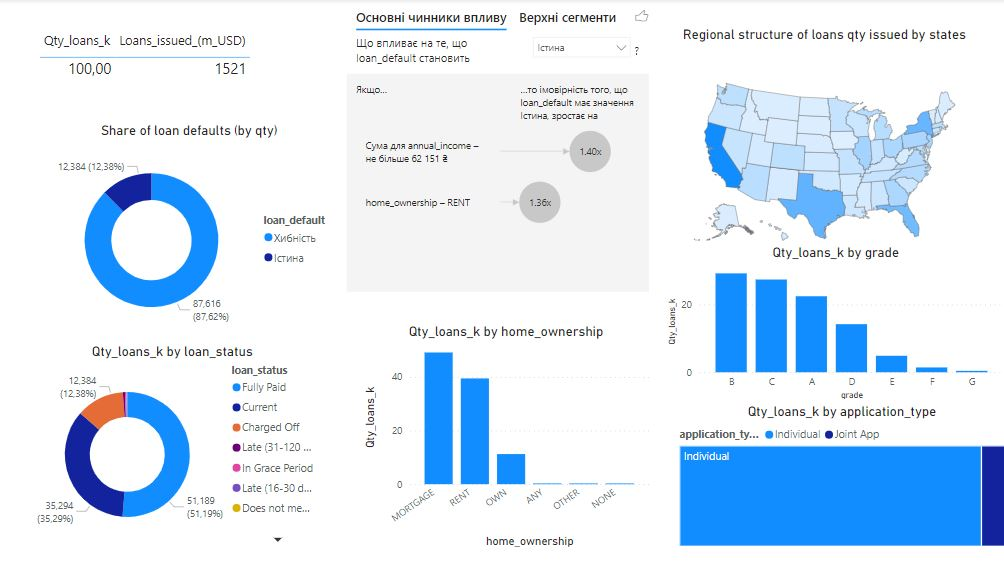

In [37]:
#another brief look at general dataset features
# Load and display the image
from PIL import Image
from IPython.display import display

image = Image.open("/Users/Andriy.Bespalyy/Desktop/data_sc/the_project/explore.jpg")
display(image)

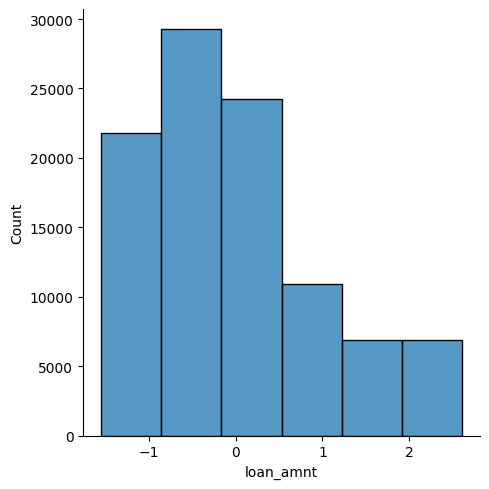

In [38]:
# lets check the most critical features, such as loan_amnt, int_rate_clean, term_clean, dti and the ones with possible max anomalies total_bc_limit
from scipy import stats
import numpy as np
import seaborn as sns

# Calculating on a single column, e.g. loan amount
z_scores = stats.zscore(df["loan_amnt"])
sns.displot(z_scores, bins = 6)

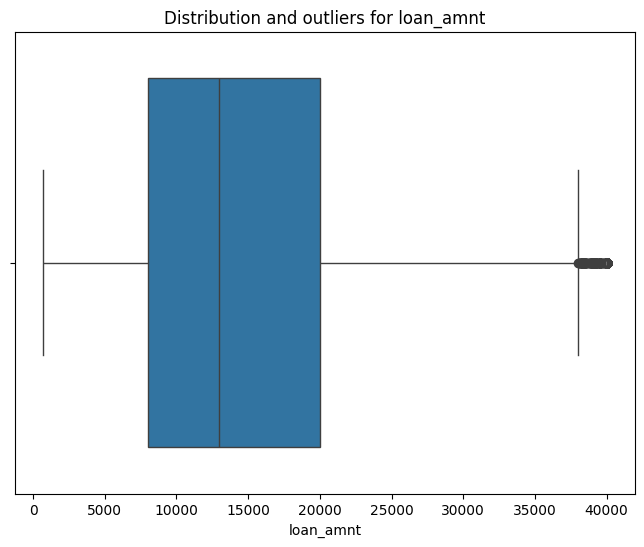

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "loan_amnt"

# Plotting variable distribution with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 35000.0
Maximum value of z score after capping: 2.159485621069637


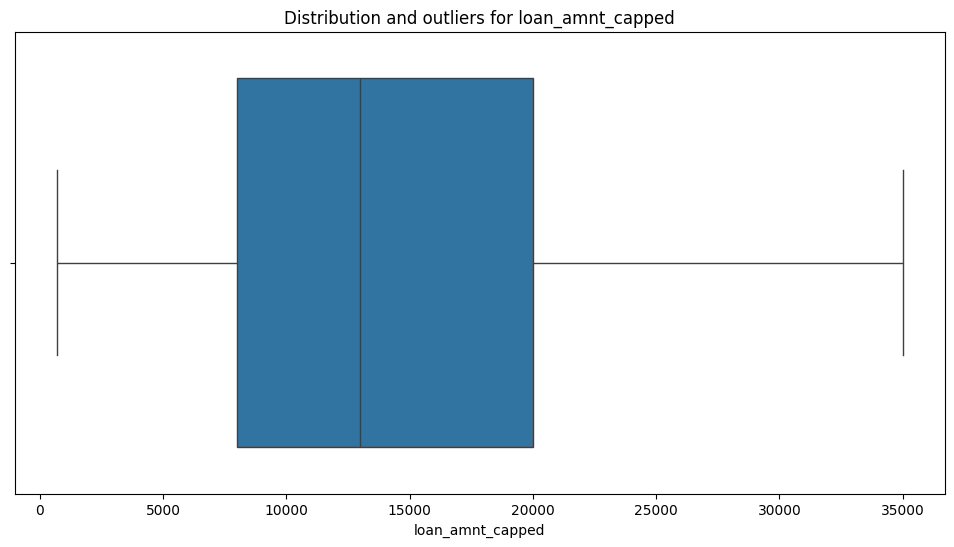

In [40]:
# as seen from the graph, there is a small outlier in the high-end quantile 
field_to_treat = "loan_amnt"

field_to_treat_capped = f"{field_to_treat}_capped"

# e.g.: Capping outliers at 95th percentile
cap_value = df[field_to_treat].quantile(0.95)
print(f"Value to be applied as cap: {cap_value}")

df[field_to_treat_capped] = np.where(df[field_to_treat] > cap_value, cap_value, df[field_to_treat])

print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()


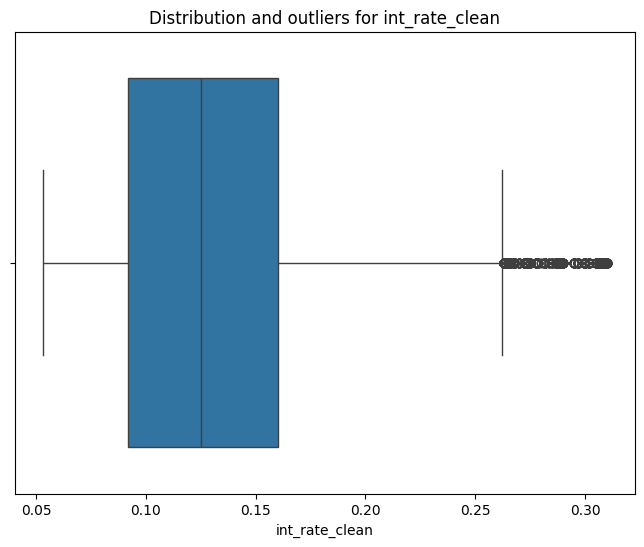

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "int_rate_clean"

# Plotting variable distribution with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 0.2235
Maximum value of z score after capping: 2.094243123051474


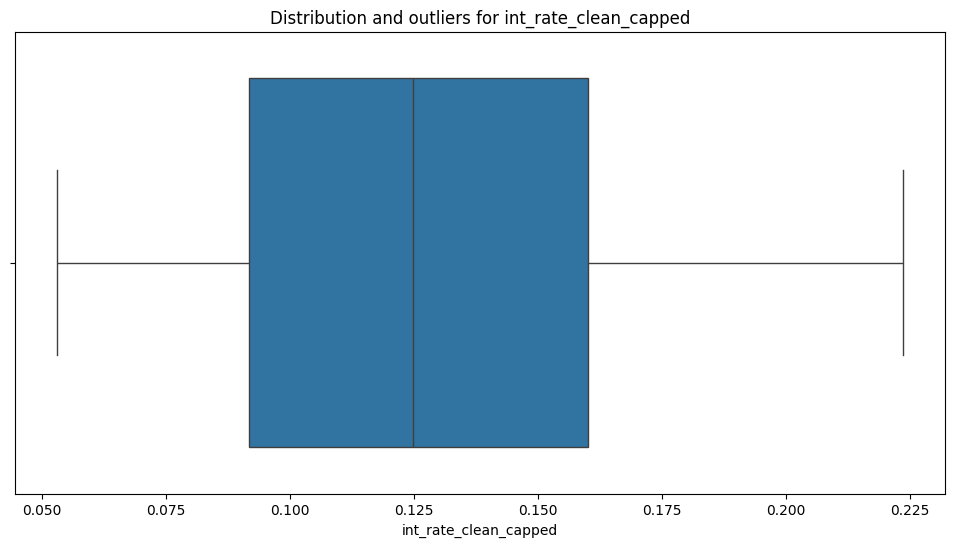

In [42]:
# as seen from the graph, there is a small outlier in the high-end quantile 
field_to_treat = "int_rate_clean"

field_to_treat_capped = f"{field_to_treat}_capped"

# e.g.: Capping outliers at 95th percentile
cap_value = df[field_to_treat].quantile(0.95)
print(f"Value to be applied as cap: {cap_value}")

df[field_to_treat_capped] = np.where(df[field_to_treat] > cap_value, cap_value, df[field_to_treat])

print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()


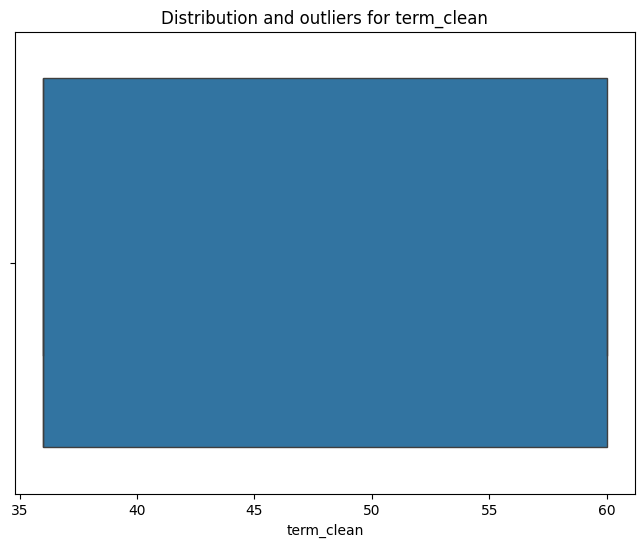

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "term_clean"

# Plotting variable distribution with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()


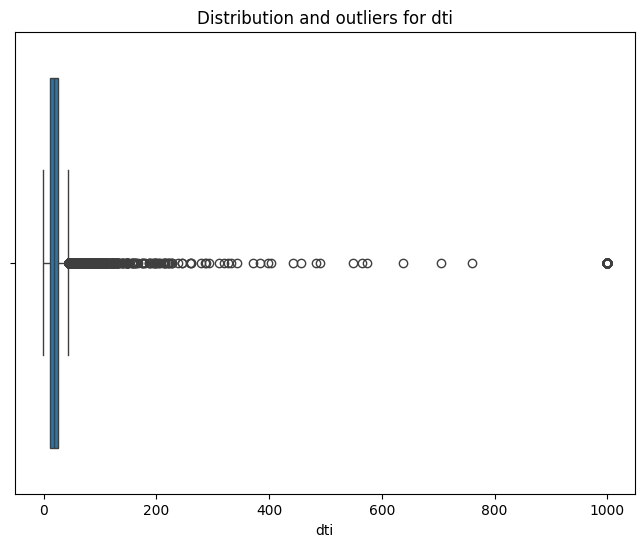

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "dti"

# Plotting variable distribution with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 34.75
Maximum value of z score after capping: 2.2697099205748446


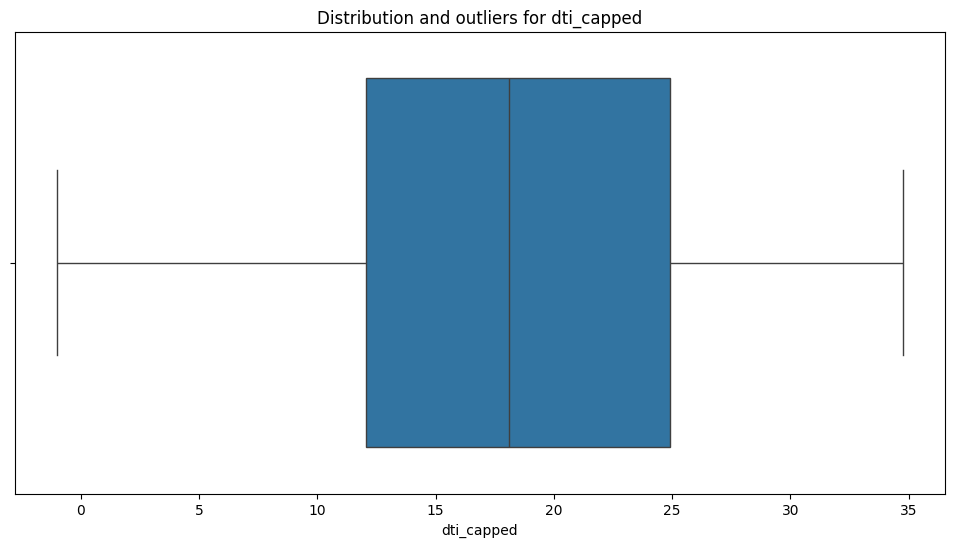

In [45]:
# as seen from the graph, there is a small outlier in the high-end quantile 
field_to_treat = "dti"

field_to_treat_capped = f"{field_to_treat}_capped"

# e.g.: Capping outliers at 95th percentile
cap_value = df[field_to_treat].quantile(0.95)
print(f"Value to be applied as cap: {cap_value}")

df[field_to_treat_capped] = np.where(df[field_to_treat] > cap_value, cap_value, df[field_to_treat])

print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

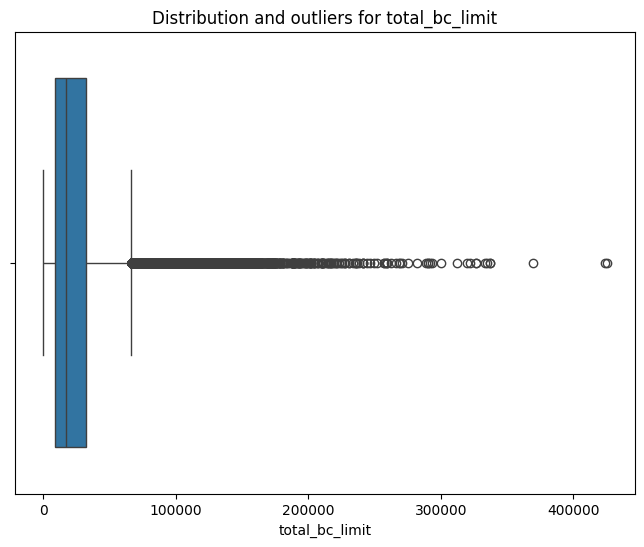

In [46]:

import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "total_bc_limit"

# Plotting variable distribution with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 53800.0
Maximum value of z score after capping: 1.965022963800016


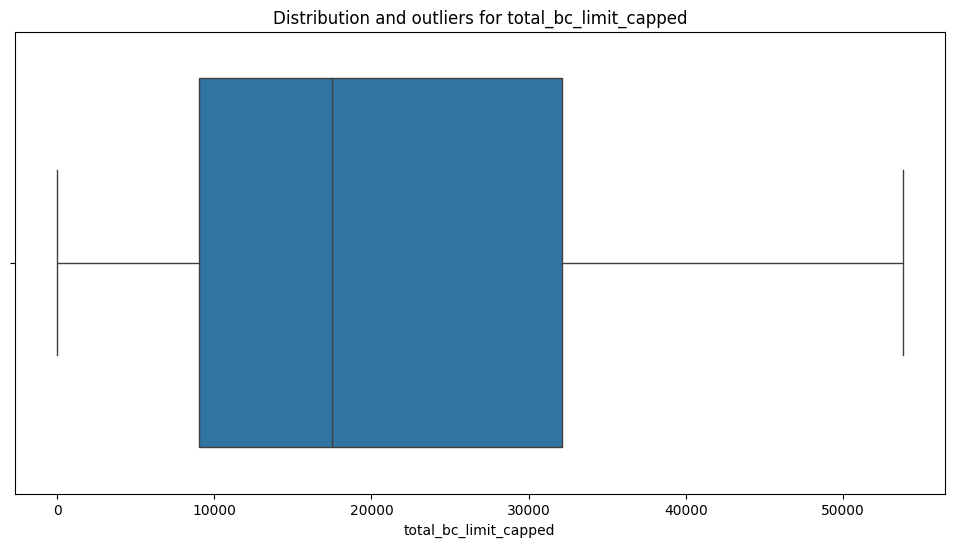

In [47]:
# as seen from the graph, there is a small outlier in the high-end quantile 
field_to_treat = "total_bc_limit"

field_to_treat_capped = f"{field_to_treat}_capped"

# e.g.: Capping outliers at 95th percentile
cap_value = df[field_to_treat].quantile(0.90)
print(f"Value to be applied as cap: {cap_value}")

df[field_to_treat_capped] = np.where(df[field_to_treat] > cap_value, cap_value, df[field_to_treat])

print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

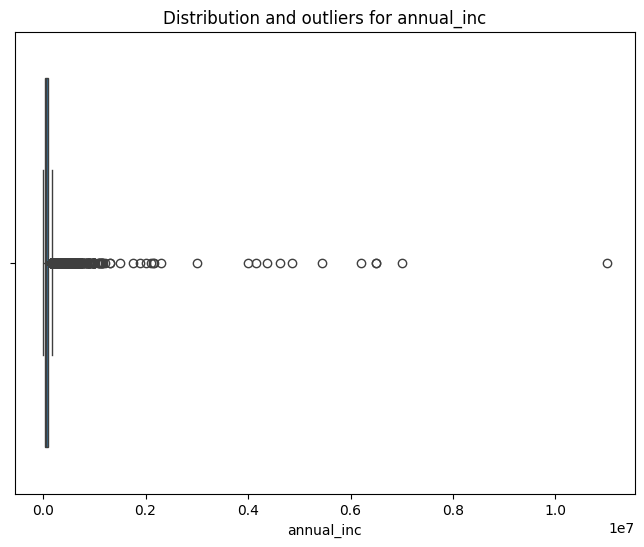

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

field_to_plot = "annual_inc"

# Plotting variable distribution with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

Value to be applied as cap: 170000.0
Maximum value of z score after capping: 2.458045884915565


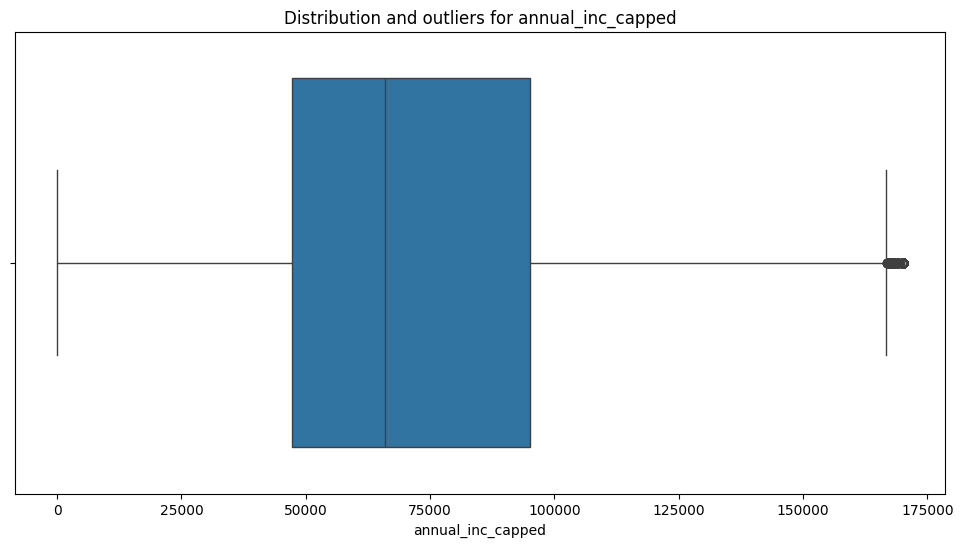

In [49]:
# as seen from the graph, there is a small outlier in the high-end quantile 
field_to_treat = "annual_inc"

field_to_treat_capped = f"{field_to_treat}_capped"

# e.g.: Capping outliers at 95th percentile
cap_value = df[field_to_treat].quantile(0.95)
print(f"Value to be applied as cap: {cap_value}")

df[field_to_treat_capped] = np.where(df[field_to_treat] > cap_value, cap_value, df[field_to_treat])

print(f"Maximum value of z score after capping: {max(np.abs(stats.zscore(df[field_to_treat_capped])))}")

field_to_plot = field_to_treat_capped

# Plotting variable distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[field_to_plot])
plt.title(f"Distribution and outliers for {field_to_plot}")
plt.show()

In [50]:
#Our hypothesis that some of the object features may have influence over credit decision accuracy:
#Here is the list of assumed features:
dummies_1 = pd.get_dummies(df['home_ownership'], prefix='home_ownership')
df = pd.concat([df, dummies_1], axis=1)

In [51]:
dummies_2 = pd.get_dummies(df['purpose'], prefix='purpose')
df = pd.concat([df, dummies_2], axis=1)
dummies_4 = pd.get_dummies(df['grade'], prefix='grade')
df = pd.concat([df, dummies_4], axis=1)

In [52]:
#Lets check the newly created columns were added to dataframe: 
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0    4000.00      4000.00          4000.00   36 months   13.08%       134.93   
1   24000.00     24000.00         24000.00   60 months    9.16%       500.07   
2    5000.00      5000.00          5000.00   36 months   10.49%       162.49   
3   24000.00     24000.00         24000.00   60 months   11.05%       522.42   
4   14000.00     14000.00         14000.00   60 months   13.59%       322.79   

  grade sub_grade       emp_title  emp_length home_ownership  annual_inc  \
0     B        B5         cashier       10.00       MORTGAGE    48000.00   
1     B        B2             ABM        6.00           RENT    57000.00   
2     B        B3          driver       10.00       MORTGAGE    55000.00   
3     B        B4   Not specified        5.92       MORTGAGE    43500.00   
4     C        C2  Shipping Clerk       10.00       MORTGAGE    48000.00   

   verification_status   issue_d loan_status pymnt_plan             purpose  \
0                    1  Mar-2020     Current          n    home_improvement   
1                    1  Feb-2016     Current          n         credit_card   
2                    0  Jan-2015  Fully Paid          n         credit_card   
3                    0  Jun-2018     Current          n  debt_consolidation   
4                    1  Jan-2018  Fully Paid          n  debt_consolidation   

                     title addr_state   dti  delinq_2yrs earliest_cr_line  \
0         Home improvement         NY 20.25         1.00         Dec-2004   
1  Credit card refinancing         LA 25.33         0.00         Jan-2004   
2  Credit card refinancing         FL  7.22         0.00         Apr-2010   
3       Debt consolidation         OH 24.55         0.00         Oct-2005   
4       Debt consolidation         NE 24.30         0.00         Apr-2008   

   fico_range_low  fico_range_high  inq_last_6mths  open_acc  pub_rec  \
0          665.00           669.00            0.00      4.00     1.00   
1          680.00           684.00            0.00     10.00     0.00   
2          665.00           669.00            0.00      7.00     1.00   
3          750.00           754.00            0.00     15.00     0.00   
4          735.00           739.00            1.00     16.00     0.00   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0    1988.00       82.80      12.00                   w    3816.34   
1   22697.00       64.50      24.00                   w    4333.29   
2    6001.00       52.60       9.00                   f       0.00   
3    6573.00       12.10      23.00                   w   16317.69   
4   11894.00       27.10      23.00                   w       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34       266.95           266.95           183.66   
1        4333.29     25496.16         25496.16         19666.71   
2           0.00      5846.67          5846.67          5000.00   
3       16317.69     12000.93         12000.93          7682.31   
4           0.00     16605.68         16605.68         14000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0          83.29                0.00        0.00                     0.00   
1        5829.45                0.00        0.00                     0.00   
2         846.67                0.00        0.00                     0.00   
3        4318.62                0.00        0.00                     0.00   
4        2605.68                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt         next_pymnt_d last_credit_pull_d  \
0     May-2020           134.93             Jun-2020           May-2020   
1     May-2020           500.07             Jun-2020           May-2020   
2     Jan-2018           162.43  1970-01-01 00:00:00           May-2020   
3     May-2020           522.42             Jun-2020           May-2020   
4     Jul-2019         111

In [53]:
df.shape

(100000, 147)

In [54]:
# First and furthermost for assessing the quality of decision, we need the feature, characterising the defaul loan: 
df['loan_default'] = df.loan_status == "Charged Off"
df['loan_default'].value_counts()

loan_default
False    87616
True     12384
Name: count, dtype: int64

In [55]:
#lets introduce loan amount to annual income feature, interest_per_l_amount,  total_bc_lim  to aannual income
df['debt_to_income'] = df['loan_amnt_capped']/df['annual_inc_capped']
df['interest_per_loan_amount'] = df['int_rate_clean_capped'] * df['loan_amnt_capped'] * df['term_clean']/12
df['total_limits_to_income'] = (df['total_bc_limit_capped'])/df['annual_inc_capped']
fill_nine_cols = [
     'debt_to_income', 'interest_per_loan_amount', 'total_limits_to_income'
]
# Apply fill with 999
df[fill_nine_cols] = df[fill_nine_cols].replace(np.inf, 999)


In [56]:
'total_limits_to_income'


'total_limits_to_income'

Lets look on the correlation heatmap among the numeric features

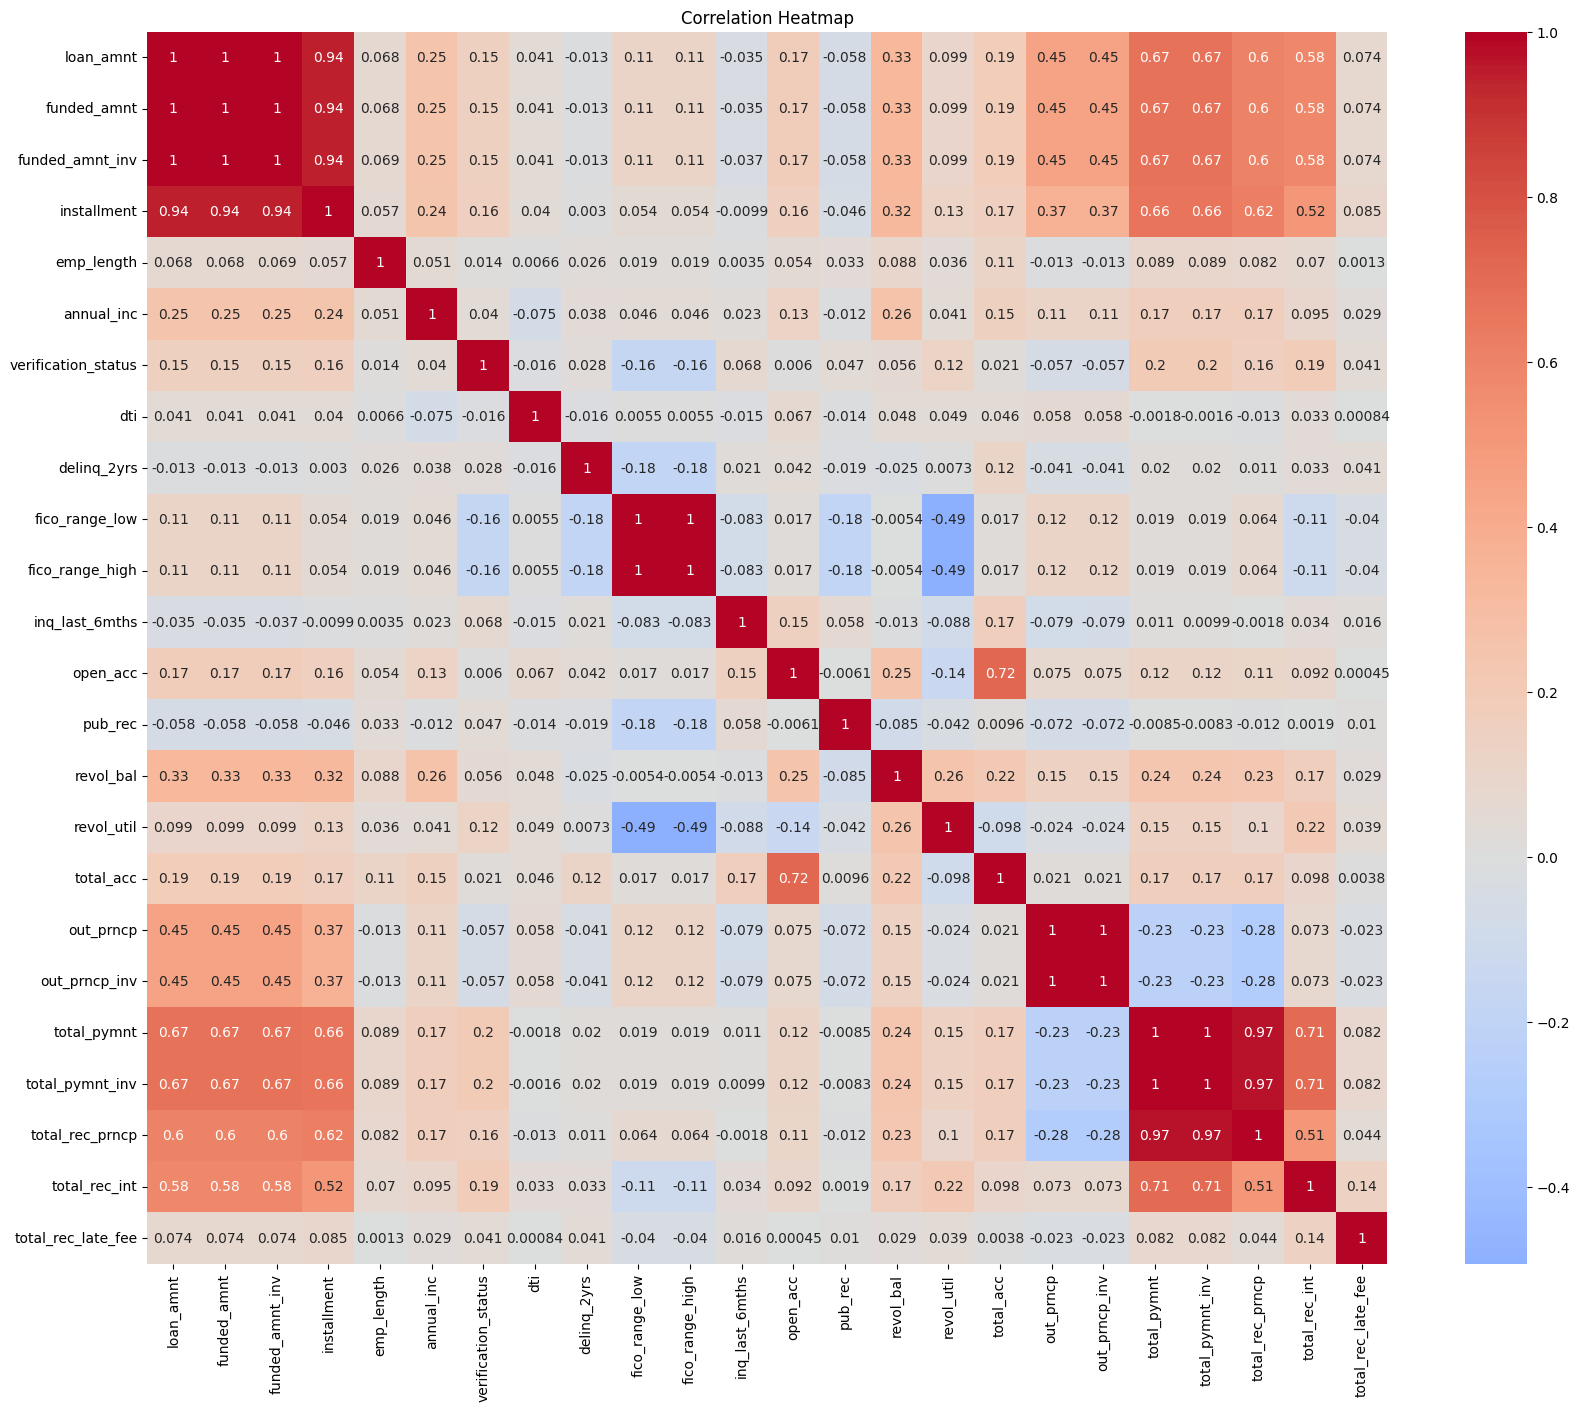

In [57]:
# Select numeric columns only
df_numeric = df.select_dtypes(exclude="object")
plt.figure(figsize=(20, 16))
sns.heatmap(df_numeric \
            .drop(columns=df_numeric.columns[24:]) \
            .corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


From the plot above we see, that the loan amount has mild positive correlation with annual income and verification status, 
some other features, connected with loan services obviously have higher correlation as part of total amount terms, here is the strict causal interconnection.

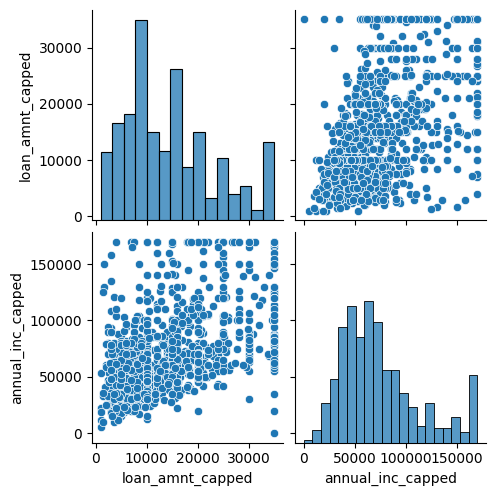

In [58]:
features = ["loan_amnt_capped","annual_inc_capped"]

df_sampled = df[features].sample(1000)

list_to_plot = ["loan_amnt_capped","annual_inc_capped"]
sns.pairplot(df_sampled[list_to_plot])

Another interesting pair of factors are fico scores against the revol_util rate, the higher utilisation, the worse is score

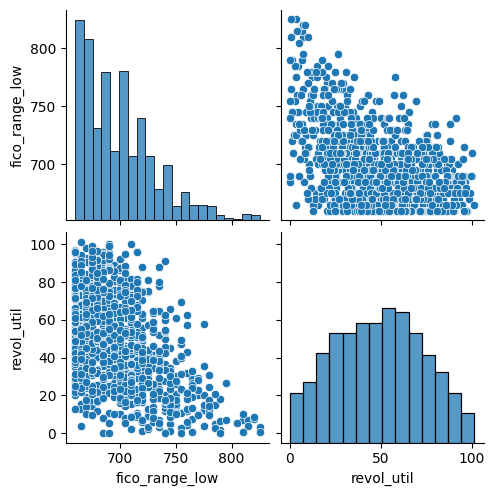

In [59]:
features = ['fico_range_low','revol_util']

df_sampled = df[features].sample(1000)

list_to_plot = ['fico_range_low','revol_util']
sns.pairplot(df_sampled[list_to_plot])

Obviously, the absence of verification or pub_reg have also negative impact over the fico score as well 

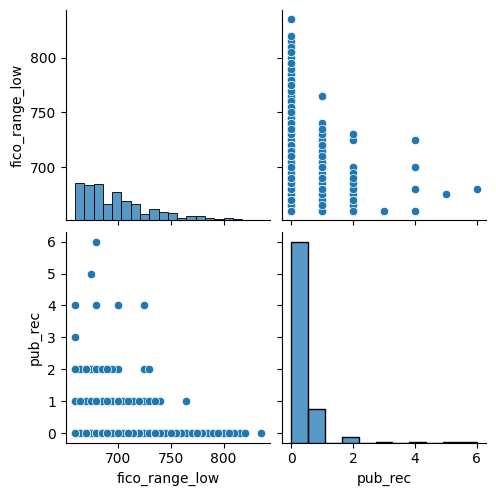

In [60]:
features = ['fico_range_low','pub_rec']

df_sampled = df[features].sample(1000)

list_to_plot = ['fico_range_low','pub_rec']
sns.pairplot(df_sampled[list_to_plot])

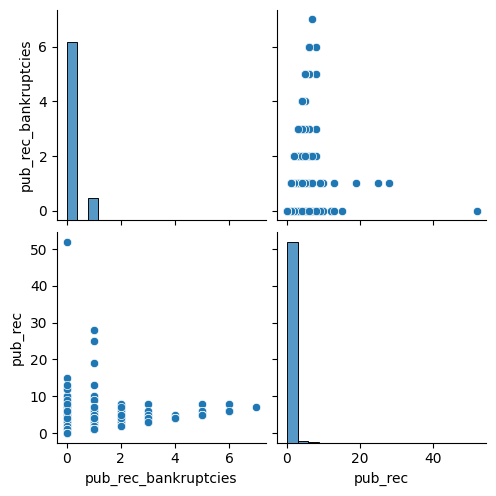

In [61]:
features = ['pub_rec_bankruptcies','pub_rec']


list_to_plot = ['pub_rec_bankruptcies','pub_rec']
sns.pairplot(df[list_to_plot])

Ok, lets check again the key stats of loan_amnt_capped, int_rate_clean_capped, annual_inc_capped and total_bc_limit_capped

In [62]:
from scipy.stats import skew
def summary_statistics_1(df, col_name):

  mean = "%.2f" %df[col_name].mean()
  median = "%.2f" %df[col_name].median()
  mode = "%.2f" %df[col_name].mode()[0]
  std =   "%.2f" %df[col_name].std()
  percentiles =  df[col_name].quantile([0.25, 0.5, 0.75])
  skewness_value = "%.2f" %skew(df[col_name])

  print(f"Mean: {mean}")
  print(f"Median: {median}")
  print(f"Mode: {mode}")
  print(f"Standard Deviation: {std}")
  print(f"Percentiles: \n{percentiles}")
  print("Skewness:", skewness_value)


summary_statistics_1(df,"loan_amnt_capped")

Mean: 15205.16
Median: 13000.00
Mode: 10000.00
Standard Deviation: 9166.51
Percentiles: 
0.25    8000.00
0.50   13000.00
0.75   20000.00
Name: loan_amnt_capped, dtype: float64
Skewness: 0.67


In [63]:
from scipy.stats import skew
def summary_statistics_1(df, col_name):

  mean = "%.2f" %df[col_name].mean()
  median = "%.2f" %df[col_name].median()
  mode = "%.2f" %df[col_name].mode()[0]
  std =   "%.2f" %df[col_name].std()
  percentiles =  df[col_name].quantile([0.25, 0.5, 0.75])
  skewness_value = "%.2f" %skew(df[col_name])

  print(f"Mean: {mean}")
  print(f"Median: {median}")
  print(f"Mode: {mode}")
  print(f"Standard Deviation: {std}")
  print(f"Percentiles: \n{percentiles}")
  print("Skewness:", skewness_value)


summary_statistics_1(df,"int_rate_clean_capped")

Mean: 0.13
Median: 0.12
Mode: 0.22
Standard Deviation: 0.05
Percentiles: 
0.25   0.09
0.50   0.12
0.75   0.16
Name: int_rate_clean_capped, dtype: float64
Skewness: 0.40


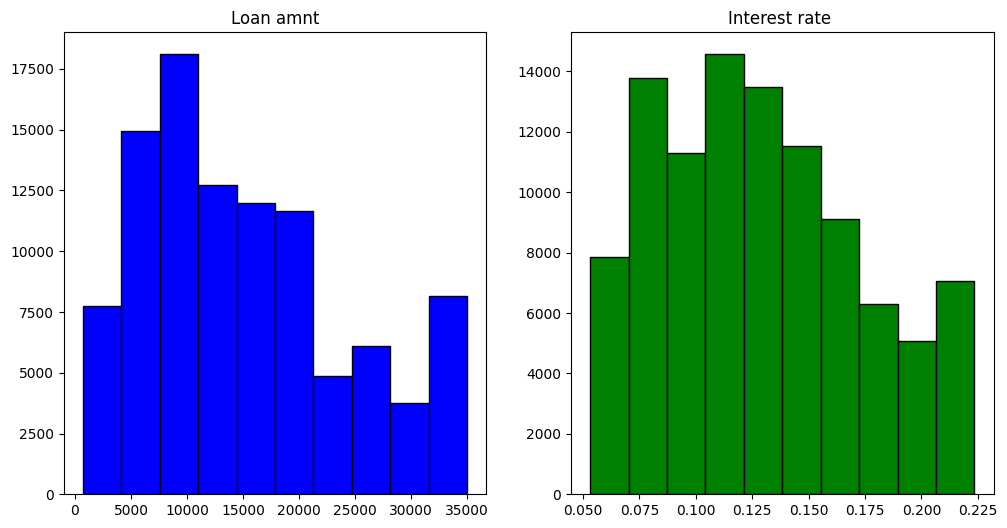

Skewness before log transform: 0.6692715684156354
Skewness after log transform: 0.40147805070066855


In [64]:
import matplotlib.pyplot as plt

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt_capped'], bins=10, color='blue', edgecolor='black')
plt.title('Loan amnt')

plt.subplot(1, 2, 2)
plt.hist(df['int_rate_clean_capped'], bins=10, color='green', edgecolor='black')
plt.title('Interest rate ')

plt.show()

print(f"Skewness before log transform: {skew(df['loan_amnt_capped'])}")
print(f"Skewness after log transform: {skew(df['int_rate_clean_capped'])}")

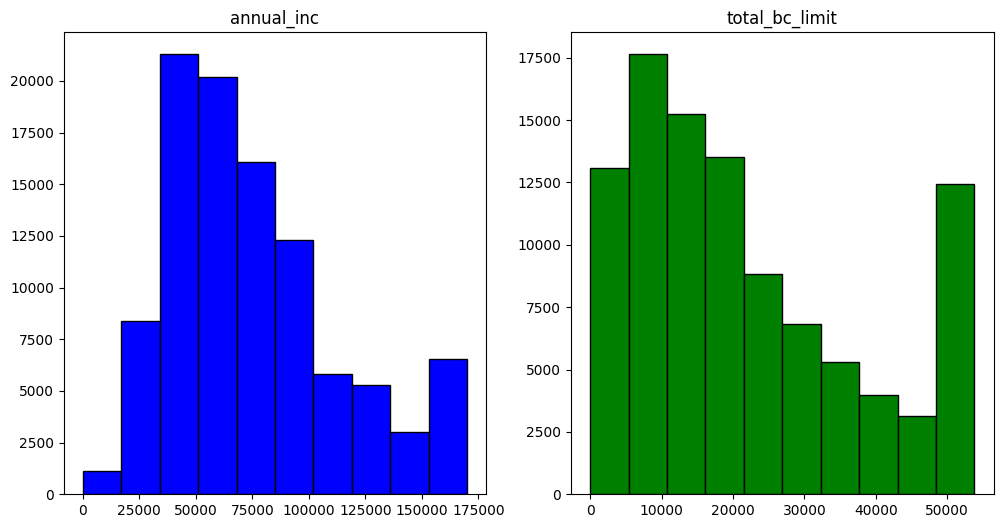

Skewness before log transform: 0.8998726410316669
Skewness after log transform: 0.7305633367312715


In [65]:
# annual_inc_capped and total_bc_limit_capped
import matplotlib.pyplot as plt

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['annual_inc_capped'], bins=10, color='blue', edgecolor='black')
plt.title('annual_inc')

plt.subplot(1, 2, 2)
plt.hist(df['total_bc_limit_capped'], bins=10, color='green', edgecolor='black')
plt.title('total_bc_limit')

plt.show()

print(f"Skewness before log transform: {skew(df['annual_inc_capped'])}")
print(f"Skewness after log transform: {skew(df['total_bc_limit_capped'])}")


Lets build our baseline metrics

In [66]:
#Financial impact of having no model
import pandas as pd
qty_of_loans_issued = len(df)
qty_of_default_loans = df.loc[df['loan_default'] == True, 'loan_default'].sum()
total_loan_amount_sum = df['loan_amnt_capped'].sum()
total_int_if_repaid = df['interest_per_loan_amount'].sum()
total_default_loans_sum = df.loc[df['loan_default'] == True, 'loan_amnt_capped'].sum()
total_default_int_sum = df.loc[df['loan_default'] == True, 'interest_per_loan_amount'].sum()
total_default_interest_sum = df.loc[df['loan_default'] == True, 'interest_per_loan_amount'].sum()
total_losses_from_defaults = 0.6*(total_default_loans_sum + total_default_interest_sum)
total_ebitda = total_int_if_repaid - total_losses_from_defaults
average_loan =  total_loan_amount_sum/qty_of_loans_issued
average_int_sum = total_int_if_repaid/qty_of_loans_issued
ebitda_margin = total_ebitda/total_int_if_repaid
share_of_default_loans_in_usd =  total_default_loans_sum/total_loan_amount_sum
share_fo_default_loans_in_qty =  qty_of_default_loans/qty_of_loans_issued
share_of_defaul_int_pmt = total_default_int_sum/total_int_if_repaid


print(f"qty_of_loans_issued:  {qty_of_loans_issued:,.2f} ")
print(f"qty_of_default_loans:  {qty_of_default_loans:,.2f} ")
print(f"total_loan_amount_sum:  {total_loan_amount_sum/1000000:,.2f}M ")
print(f"total_int_if_repaid:  {total_int_if_repaid/1000000:,.2f}M ")
print(f"total_default_loans_sum:  {total_default_loans_sum/1000000:,.2f}M ")
print(f"total_default_int_sum:  {total_default_int_sum/1000000:,.2f}M ")
print(f"total_losses_from_defaults:  {total_losses_from_defaults/1000000:,.2f}M ")
print(f"total_ebitda:  {total_ebitda/1000000:,.2f}M ")
print(f"average_loan:  {average_loan:,.2f} ")
print(f"average_int_sum:  {average_int_sum:,.2f} ")
print(f"ebitda_margin:  {ebitda_margin:,.2%} ")
print(f"share_of_default_loans_in_usd:  {share_of_default_loans_in_usd:,.2%} ")
print(f"share_fo_default_loans_in_qty:  {share_fo_default_loans_in_qty:,.2%} ")

qty_of_loans_issued:  100,000.00 
qty_of_default_loans:  12,384.00 
total_loan_amount_sum:  1,520.52M 
total_int_if_repaid:  785.08M 
total_default_loans_sum:  194.66M 
total_default_int_sum:  126.25M 
total_losses_from_defaults:  192.55M 
total_ebitda:  592.53M 
average_loan:  15,205.16 
average_int_sum:  7,850.79 
ebitda_margin:  75.47% 
share_of_default_loans_in_usd:  12.80% 
share_fo_default_loans_in_qty:  12.38% 


Before starting modelling, lets make one important assumption. As far as we assume that the total quantity of loans, as well as the total amount of loans issued remain the same, we assume that the False Positive cases will be ultimately subsituted with other True Negative (normal loans) cases.

In [67]:
#Lets build the logistic regression model: 
# For now, select a few features to build a simple model
features = ['last_fico_range_low','last_fico_range_high','annual_inc_capped', 'dti_capped', 
'int_rate_clean',
'verification_status']


            #'int_rate_clean','recoveries' ]
            #'last_fico_range_low',


#,
#            'installment'
X = df[features]
y = df['loan_default']

In [68]:
from sklearn.impute import SimpleImputer

# LogisticRegression model in scikit-learn cannot handle missing values represented as NaN (Not a Number), hence replacing
# Create an imputer (replace missing values with the mean of the column)
imputer = SimpleImputer(strategy='mean')
# What pandas method did we see previously to accomplish this?

# Fit the imputer
X = imputer.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
for dframe in [X_train, X_test, y_train, y_test]:
    print(f"Shape: {dframe.shape}")


Shape: (80000, 6)
Shape: (20000, 6)
Shape: (80000,)
Shape: (20000,)


In [71]:
model_1 = LogisticRegression(max_iter=100000000)
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=100000000)

In [72]:
predictions = model_1.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall_1 = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, model_1.predict_proba(X_test)[:,1])
y_pred_proba = model_1.predict_proba(X_test)[:, 1]

threshold = 0.5
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.9234
Precision: 0.7175277643650411
Recall: 0.6107685984381422
F1-Score: 0.6598579040852576
ROC-AUC: 0.9446570257430942
Confusion Matrix:
[[16982   585]
 [  947  1486]]


In [74]:
#Lets test if the model overfitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and calculate accuracy on training and validation sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.89
Validation Accuracy: 0.90


C:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
overfitting_1 = abs(test_accuracy - train_accuracy)

print(f"overfitting_1: {overfitting_1:,.2%}")

overfitting_1: 0.32%


In [76]:
#Estimating the result: 
share_of_default_loans_model_1_qty = share_fo_default_loans_in_qty * (1- recall_1)
total_default_loans_sum_model_1 = share_of_default_loans_model_1_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_1 = share_of_default_loans_model_1_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_1 = 0.6*(total_default_loans_sum_model_1 + total_default_int_sum_model_1)
total_ebitda_1 = total_int_if_repaid - total_losses_from_defaults_1
ebitda_margin_1 = total_ebitda_1/total_int_if_repaid
incremental_ebitda_1 = total_ebitda_1 - total_ebitda

print(f"share_of_default_loans_model_1_qty:  {share_of_default_loans_model_1_qty:,.2%} ")
print(f"ebitda_margin_1:  {ebitda_margin_1:,.2%} ")
print(f"incremental_ebitda_1:  {incremental_ebitda_1/1000000:,.2f}M ")

share_of_default_loans_model_1_qty:  4.82% 
ebitda_margin_1:  91.51% 
incremental_ebitda_1:  125.87M 


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (again, given imputer used above)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def model_evaluation_report(X_test, y_test, y_pred, y_prob):

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) #classifier.predict_proba(X_test)[:,1])

    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')
    print(f'Confusion Matrix:\n{cm}')

In [79]:
# Make predictions
rf_y_pred = rf.predict(X_test)
rf_y_prob = rf.predict_proba(X_test)[:,1]

model_evaluation_report(X_test, y_test, rf_y_pred, rf_y_prob)



Accuracy: 0.91745
Precision: 0.673932384341637
Recall: 0.6226880394574599
F1-Score: 0.6472975859859005
ROC-AUC: 0.934549366992828
Confusion Matrix:
[[16834   733]
 [  918  1515]]


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.92


In [81]:
overfitting_2 = abs(test_accuracy - train_accuracy)

print(f"overfitting_2: {overfitting_2:,.2%}")

overfitting_2: 8.18%


In [82]:
#using the same set of features and applied the random_forest classifier gives us the next results: 
share_of_default_loans_model_2_qty = share_fo_default_loans_in_qty * (1-0.6226880394574599)
total_default_loans_sum_model_2 = share_of_default_loans_model_2_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_2 = share_of_default_loans_model_2_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_2 = 0.6*(total_default_loans_sum_model_2 + total_default_int_sum_model_2)
total_ebitda_2 = total_int_if_repaid - total_losses_from_defaults_2
ebitda_margin_2 = total_ebitda_2/total_int_if_repaid
incremental_ebitda_2 = total_ebitda_2 - total_ebitda


print(f"share_of_default_loans_model_2_qty:  {share_of_default_loans_model_2_qty:,.2%} ")
print(f"ebitda_margin_2:  {ebitda_margin_2:,.2%} ")
print(f"incremental_ebitda_2:  {incremental_ebitda_2/1000000:,.2f}M ")

share_of_default_loans_model_2_qty:  4.67% 
ebitda_margin_2:  91.77% 
incremental_ebitda_2:  127.91M 


In [83]:
df_numeric = df.select_dtypes(exclude=['object'])
print(f"Number of columns: {len(df_numeric.columns)}")

Number of columns: 122


In [84]:
# Then, let's drop the target variable from X
X = df_numeric.drop(columns=['loan_default'])
y = df_numeric['loan_default']
X_columns = X.columns
print(f"Number of columns: {len(X_columns)}")

# RandomForestClassifier model in scikit-learn cannot handle missing values represented as NaN (Not a Number), hence replacing
# Create an imputer (replace missing values with the mean of the column,
imputer = SimpleImputer(strategy='mean')
# Fit the imputer
X = pd.DataFrame(imputer.fit_transform(X)) # fit_transform returns an array, dataframe needed for Step 4

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Number of columns: 121


In [85]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [86]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf,
          n_features_to_select=20, # n_features_to_select = number of features to select
          step=30,                  # step=1 means remove one feature at a time
          verbose = 3)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

Fitting estimator with 121 features.
Fitting estimator with 91 features.
Fitting estimator with 61 features.
Fitting estimator with 31 features.


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20,
    step=30, verbose=3)

In [87]:
selected_features = X_train.columns[rfe.support_]
selected_features_names = X_columns[selected_features]
print("Selected Features by RFE:")
print(f"Index: {selected_features}")
print(f"Column names: {selected_features_names}")

Selected Features by RFE:
Index: Index([0, 1, 2, 3, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 84, 86, 118,
       119],
      dtype='int64')
Column names: Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'int_rate_clean', 'loan_amnt_capped',
       'debt_to_income', 'interest_per_loan_amount'],
      dtype='object')


In [88]:
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)

RandomForestClassifier(random_state=42)

In [89]:
y_pred_selected = rf_selected.predict(X_test[selected_features])
y_prob_selected = rf_selected.predict_proba(X_test[selected_features])[:,1]

In [90]:
model_evaluation_report(X_test[selected_features], y_test, y_pred_selected, y_prob_selected)

Accuracy: 0.9976666666666667
Precision: 0.9968961625282167
Recall: 0.9835746102449888
F1-Score: 0.9901905829596412
ROC-AUC: 0.9998720765844056
Confusion Matrix:
[[26397    11]
 [   59  3533]]


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


In [92]:
overfitting_2_1 = abs(test_accuracy - train_accuracy)

print(f"overfitting_2_1: {overfitting_2_1:,.2%}")

overfitting_2_1: 0.46%


In [93]:
import matplotlib.pyplot as plt

importances = rf_selected.feature_importances_
print(type(importances))


<class 'numpy.ndarray'>


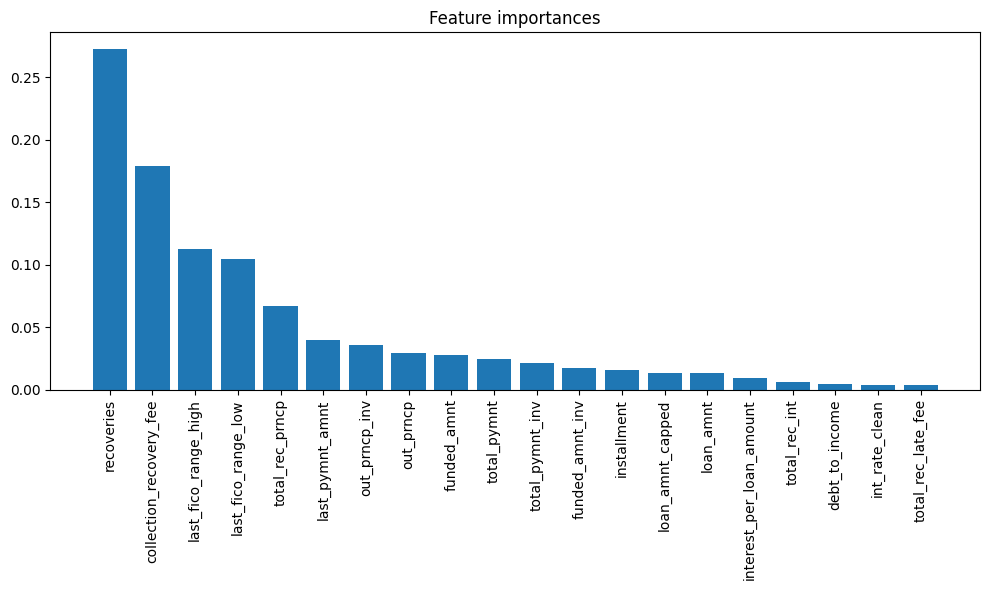

In [94]:
# Sort the array in descending order
indices = np.argsort(importances)[::-1]
# argsort > returns the indices of the importances array in ascending order.
# [::-1]  > reverses the array, making the sorting descending.
# It uses Python's slice notation, where the syntax is [start:stop:step]

col_labels = X_columns[X[selected_features].columns[indices]]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X[selected_features].shape[1]), importances[indices], align="center")
plt.xticks(ticks = range(X[selected_features].shape[1])
           , labels = col_labels, rotation=90)
plt.tight_layout()
plt.show()

As wee from the results, it identifies almost all of the default loans, however, we should eliminate those factors, that already characterising the default loan: 
 recoveries (it is an outcome, not the reason), collection_recovery_fee, total_rec_prncp (we don`t have paid principal by the moment of application, last_pymnt_amnt, total_pymnt, total_pymnt_inv, installment, loan_amnt, total_rec_int, debt_to_income, total_rec_late_fee

In [95]:
# Then, let's drop the target variable from X
X = df_numeric.drop(columns=['loan_default', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt','debt_to_income', 'interest_per_loan_amount' ])
y = df_numeric['loan_default']
X_columns = X.columns
print(f"Number of columns: {len(X_columns)}")

# RandomForestClassifier model in scikit-learn cannot handle missing values represented as NaN (Not a Number), hence replacing
# Create an imputer (replace missing values with the mean of the column,
imputer = SimpleImputer(strategy='mean')
# Fit the imputer
X = pd.DataFrame(imputer.fit_transform(X)) # fit_transform returns an array, dataframe needed for Step 4

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Number of columns: 105


In [96]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [97]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf,
          n_features_to_select=20, # n_features_to_select = number of features to select
          step=30,                  # step=1 means remove one feature at a time
          verbose = 3)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

Fitting estimator with 105 features.
Fitting estimator with 75 features.
Fitting estimator with 45 features.


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=20,
    step=30, verbose=3)

In [98]:
selected_features = X_train.columns[rfe.support_]
selected_features_names = X_columns[selected_features]
print("Selected Features by RFE:")
print(f"Index: {selected_features}")
print(f"Column names: {selected_features_names}")

Selected Features by RFE:
Index: Index([1, 3, 10, 11, 13, 14, 19, 31, 36, 37, 38, 41, 42, 66, 67, 70, 72, 73,
       74, 104],
      dtype='int64')
Column names: Index(['annual_inc', 'dti', 'revol_bal', 'revol_util', 'last_fico_range_high',
       'last_fico_range_low', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'int_rate_clean', 'loan_amnt_capped', 'int_rate_clean_capped',
       'dti_capped', 'total_limits_to_income'],
      dtype='object')


In [99]:
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)

RandomForestClassifier(random_state=42)

In [100]:
y_pred_selected = rf_selected.predict(X_test[selected_features])
y_prob_selected = rf_selected.predict_proba(X_test[selected_features])[:,1]

In [101]:
model_evaluation_report(X_test[selected_features], y_test, y_pred_selected, y_prob_selected)

Accuracy: 0.9247666666666666
Precision: 0.6975436519680379
Recall: 0.6561804008908686
F1-Score: 0.676230096112466
ROC-AUC: 0.9434258602289649
Confusion Matrix:
[[25386  1022]
 [ 1235  2357]]


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.93


In [103]:
overfitting_2_2 = abs(test_accuracy - train_accuracy)

print(f"overfitting_2: {overfitting_2_2:,.2%}")

overfitting_2: 7.37%


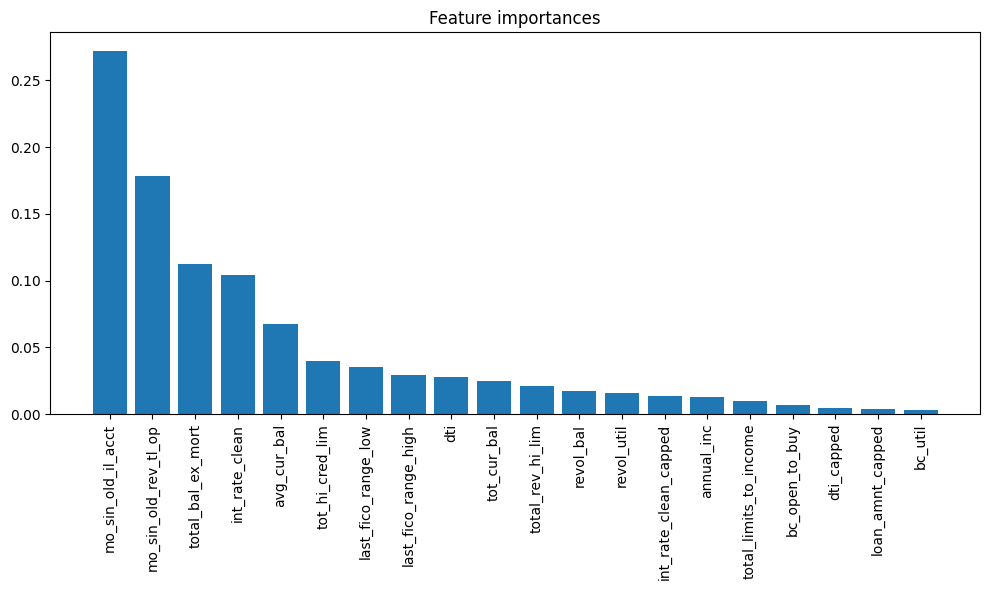

In [104]:
# Sort the array in descending order
indices = np.argsort(importances)[::-1]
# argsort > returns the indices of the importances array in ascending order.
# [::-1]  > reverses the array, making the sorting descending.
# It uses Python's slice notation, where the syntax is [start:stop:step]

col_labels = X_columns[X[selected_features].columns[indices]]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X[selected_features].shape[1]), importances[indices], align="center")
plt.xticks(ticks = range(X[selected_features].shape[1])
           , labels = col_labels, rotation=90)
plt.tight_layout()
plt.show()

#Again, we see the features, that may be the result, not the reason: 
mo_sin_old_il_acct, Months since oldest bank installment account opened, there is no installment acc for new application
mo_sin_old_rev_tl_op	Months since oldest revolving account opened, the same 
Other features for elimination:
tot_hi_limit
dti
revol_bal
int_rate_clean
total_limits_toIncome
The next elimination steps will be conducted in the third iteration:

In [105]:
# Then, let's drop the target variable from X
X = df_numeric.drop(columns=['loan_default', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt','debt_to_income', 'interest_per_loan_amount','annual_inc', 'dti', 'revol_bal', 'revol_util',
                             'total_rev_hi_lim', 'avg_cur_bal','mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'tot_hi_cred_lim', 'total_bal_ex_mort','dti_capped', 'total_limits_to_income','bc_open_to_buy',
       'int_rate_clean','tot_cur_bal'
                            ])
y = df_numeric['loan_default']
X_columns = X.columns
print(f"Number of columns: {len(X_columns)}")

# RandomForestClassifier model in scikit-learn cannot handle missing values represented as NaN (Not a Number), hence replacing
# Create an imputer (replace missing values with the mean of the column,
imputer = SimpleImputer(strategy='mean')
# Fit the imputer
X = pd.DataFrame(imputer.fit_transform(X)) # fit_transform returns an array, dataframe needed for Step 4

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Number of columns: 90


In [106]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [107]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf,
          n_features_to_select=5, # n_features_to_select = number of features to select
          step=30,                  # step=1 means remove one feature at a time
          verbose = 3)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

Fitting estimator with 90 features.
Fitting estimator with 60 features.
Fitting estimator with 30 features.


RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5,
    step=30, verbose=3)

In [108]:
selected_features = X_train.columns[rfe.support_]
selected_features_names = X_columns[selected_features]
print("Selected Features by RFE:")
print(f"Index: {selected_features}")
print(f"Column names: {selected_features_names}")

Selected Features by RFE:
Index: Index([9, 10, 59, 60, 62], dtype='int64')
Column names: Index(['last_fico_range_high', 'last_fico_range_low', 'loan_amnt_capped',
       'int_rate_clean_capped', 'annual_inc_capped'],
      dtype='object')


In [109]:
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)

RandomForestClassifier(random_state=42)

In [110]:
y_pred_selected = rf_selected.predict(X_test[selected_features])
y_prob_selected = rf_selected.predict_proba(X_test[selected_features])[:,1]

In [111]:
model_evaluation_report(X_test[selected_features], y_test, y_pred_selected, y_prob_selected)

Accuracy: 0.9166333333333333
Precision: 0.6605828672357963
Recall: 0.6247216035634744
F1-Score: 0.6421519530691085
ROC-AUC: 0.931872376486777
Confusion Matrix:
[[25255  1153]
 [ 1348  2244]]


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.93


In [113]:
overfitting_3 = abs(test_accuracy - train_accuracy)

print(f"overfitting_3: {overfitting_3:,.2%}")

overfitting_3: 7.48%


In [114]:
import matplotlib.pyplot as plt

importances = rf_selected.feature_importances_
print(type(importances))

<class 'numpy.ndarray'>


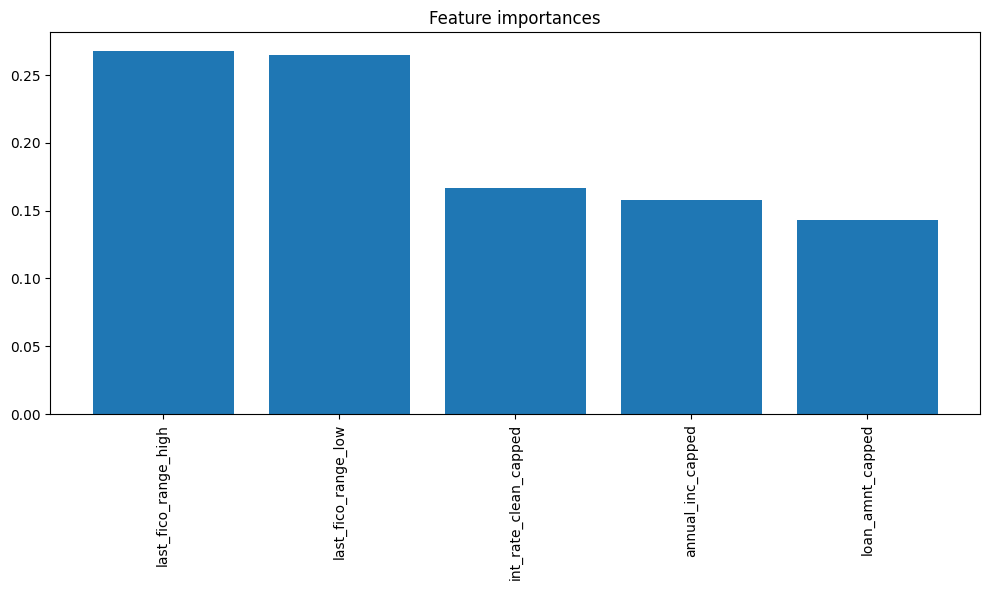

In [115]:
# Sort the array in descending order
indices = np.argsort(importances)[::-1]
# argsort > returns the indices of the importances array in ascending order.
# [::-1]  > reverses the array, making the sorting descending.
# It uses Python's slice notation, where the syntax is [start:stop:step]

col_labels = X_columns[X[selected_features].columns[indices]]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X[selected_features].shape[1]), importances[indices], align="center")
plt.xticks(ticks = range(X[selected_features].shape[1])
           , labels = col_labels, rotation=90)
plt.tight_layout()
plt.show()

In [116]:
#Ultimately we received the 5-factors rf model with the most influential features 
#Lets test the model efficiency
#using the same set of features and applied the random_forest classifier gives us the next results: 
share_of_default_loans_model_3_qty = share_fo_default_loans_in_qty * (1-0.6247216035634744)
total_default_loans_sum_model_3 = share_of_default_loans_model_3_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_3 = share_of_default_loans_model_3_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_3 = 0.6*(total_default_loans_sum_model_3 + total_default_int_sum_model_3)
total_ebitda_3 = total_int_if_repaid - total_losses_from_defaults_3
ebitda_margin_3 = total_ebitda_3/total_int_if_repaid
incremental_ebitda_3 = total_ebitda_3 - total_ebitda

print(f"share_of_default_loans_model_3_qty:  {share_of_default_loans_model_3_qty:,.2%} ")
print(f"ebitda_margin_model_3:  {ebitda_margin_3:,.2%} ")
print(f"incremental_ebitda_3:  {incremental_ebitda_3/1000000:,.2f}M ")

share_of_default_loans_model_3_qty:  4.65% 
ebitda_margin_model_3:  91.81% 
incremental_ebitda_3:  128.26M 


In [117]:
features = ['last_fico_range_low','last_fico_range_high','annual_inc_capped', 'dti_capped', 
'int_rate_clean',
'verification_status']

X = df_numeric[features]
y = df_numeric['loan_default']

In [118]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling (alternative: StandardScaler for z-score normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with same column names
X_scaled_df_numeric = pd.DataFrame(X_scaled, columns=features)
X_scaled_df_numeric.head()

last_fico_range_low  last_fico_range_high  annual_inc_capped  dti_capped  \
0                 0.79                  0.79               0.28        0.59   
1                 0.83                  0.83               0.34        0.74   
2                 0.93                  0.93               0.32        0.23   
3                 0.88                  0.88               0.26        0.71   
4                 0.92                  0.92               0.28        0.71   

   int_rate_clean  verification_status  
0            0.30                 1.00  
1            0.15                 1.00  
2            0.20                 0.00  
3            0.22                 0.00  
4            0.32                 1.00

In [119]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df_numeric, y, test_size=0.2, random_state=42)

In [120]:
def plot_training_vs_overfitting(history):
    """Plot training and validation accuracy to detect overfitting (when gap between 2 is detected)"""
    import matplotlib.pyplot as plt

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize the model (empty initially)
model = Sequential()

# Define the input layer
model.add(Input(shape=(X_scaled_df_numeric.shape[1],)))

# Adding layers to our model, which are like different parts of the brain.
# Each layer has "neurons" (like tiny decision-makers)

# First hidden layer
model.add(Dense(32, activation='relu'))

# Optional hidden layers
# model.add(Dense(32, activation='relu'))

# Another hidden layer
model.add(Dense(16, activation='relu'))

# Smaller brain part that processes what the first layer has figured out
model.add(Dense(8, activation='relu'))

# Output layer, like the brain's decision-making part
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',  # guiding it to improve at its task
    loss='binary_crossentropy',  # measures mistakes for optimization
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8442 - Precision: 0.6365 - Recall: 0.1932 - accuracy: 0.8922 - loss: 0.2848 - val_AUC: 0.9384 - val_Precision: 0.7543 - val_Recall: 0.5098 - val_accuracy: 0.9162 - val_loss: 0.2002
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9414 - Precision: 0.6828 - Recall: 0.6306 - accuracy: 0.9184 - loss: 0.1889 - val_AUC: 0.9401 - val_Precision: 0.7233 - val_Recall: 0.6028 - val_accuracy: 0.9199 - val_loss: 0.1935
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9397 - Precision: 0.6730 - Recall: 0.6579 - accuracy: 0.9187 - loss: 0.1885 - val_AUC: 0.9404 - val_Precision: 0.6605 - val_Recall: 0.7365 - val_accuracy: 0.9181 - val_loss: 0.1941
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9427 - Precision: 0.6765 - Recall: 0.6622 - accuracy: 0.9176 - loss: 0.1880 - val_AUC: 0.9414 - val_Precision: 0.6987 - val_Recall: 0.6596 - val_accuracy: 0.9202 - val_loss: 0.1899
Epoch 5/10
2000/2000 ━━━

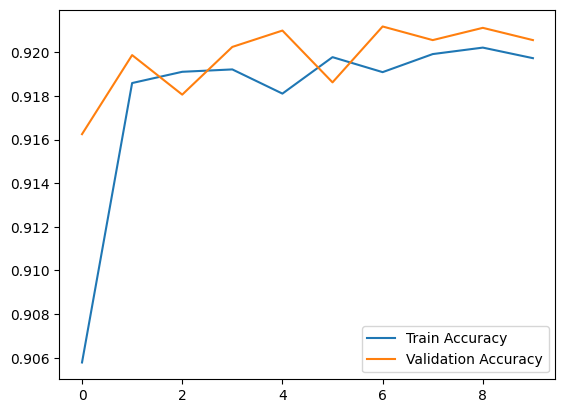

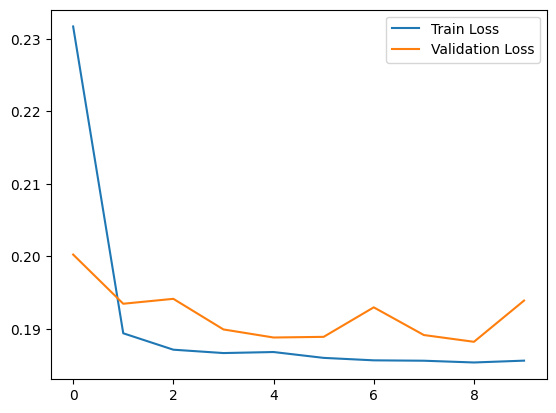

In [122]:
history_1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history_1)

In [123]:
min_val_loss_epoch_4 = history_1.history['val_loss'].index(min(history_1.history['val_loss']))
print("Best epoch:", min_val_loss_epoch_4 + 1) 

Best epoch: 9


In [124]:
recall_at_min_val_loss_4 = history_1.history['val_Recall'][min_val_loss_epoch_4]
print(f"Recall at minimal validation loss: {recall_at_min_val_loss_4:,.4f}")

Recall at minimal validation loss: 0.6352


In [125]:
val_accuracy_4 = history_1.history['val_accuracy'][min_val_loss_epoch_4]
accuracy_4 = history_1.history['accuracy'][min_val_loss_epoch_4]
overfitting_4 = abs(val_accuracy_4 - accuracy_4)

print(f"overfitting_4: {overfitting_4:,.2%}")

overfitting_4: 0.09%


In [126]:
#Ultimately we received the 5-factors rf model with the most influential features 
#Lets test the model efficiency
#using the same set of features and applied the random_forest classifier gives us the next results: 
share_of_default_loans_model_4_qty = share_fo_default_loans_in_qty * (1-recall_at_min_val_loss_4)
total_default_loans_sum_model_4 = share_of_default_loans_model_4_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_4 = share_of_default_loans_model_4_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_4 = 0.6*(total_default_loans_sum_model_4 + total_default_int_sum_model_4)
total_ebitda_4 = total_int_if_repaid - total_losses_from_defaults_4
ebitda_margin_4 = total_ebitda_4/total_int_if_repaid
incremental_ebitda_4 = total_ebitda_4 - total_ebitda

print(f"share_of_default_loans_model_4_qty:  {share_of_default_loans_model_4_qty:,.2%} ")
print(f"ebitda_margin_model_4:  {ebitda_margin_4:,.2%} ")
print(f"incremental_ebitda_4:  {incremental_ebitda_4/1000000:,.2f}M ")

share_of_default_loans_model_4_qty:  4.52% 
ebitda_margin_model_4:  92.04% 
incremental_ebitda_4:  130.04M 


In [127]:
features = ['last_fico_range_high', 'last_fico_range_low', 'loan_amnt_capped',
       'int_rate_clean_capped', 'annual_inc_capped']

X = df_numeric[features]
y = df_numeric['loan_default']

In [128]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling (alternative: StandardScaler for z-score normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with same column names
X_scaled_df_numeric = pd.DataFrame(X_scaled, columns=features)
X_scaled_df_numeric.head()

last_fico_range_high  last_fico_range_low  loan_amnt_capped  \
0                  0.79                 0.79              0.10   
1                  0.83                 0.83              0.68   
2                  0.93                 0.93              0.13   
3                  0.88                 0.88              0.68   
4                  0.92                 0.92              0.39   

   int_rate_clean_capped  annual_inc_capped  
0                   0.46               0.28  
1                   0.23               0.34  
2                   0.30               0.32  
3                   0.34               0.26  
4                   0.49               0.28

In [129]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df_numeric, y, test_size=0.2, random_state=42)

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize the model (empty initially)
model = Sequential()

# Define the input layer
model.add(Input(shape=(X_scaled_df_numeric.shape[1],)))

# Adding layers to our model, which are like different parts of the brain.
# Each layer has "neurons" (like tiny decision-makers)

# First hidden layer
model.add(Dense(32, activation='relu'))

# Optional hidden layers
# model.add(Dense(32, activation='relu'))

# Another hidden layer
model.add(Dense(16, activation='relu'))

# Smaller brain part that processes what the first layer has figured out
model.add(Dense(8, activation='relu'))

# Output layer, like the brain's decision-making part
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',  # guiding it to improve at its task
    loss='binary_crossentropy',  # measures mistakes for optimization
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8141 - Precision: 0.5534 - Recall: 0.2332 - accuracy: 0.8764 - loss: 0.3040 - val_AUC: 0.9431 - val_Precision: 0.7488 - val_Recall: 0.5357 - val_accuracy: 0.9178 - val_loss: 0.1921
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9421 - Precision: 0.7021 - Recall: 0.6429 - accuracy: 0.9217 - loss: 0.1861 - val_AUC: 0.9427 - val_Precision: 0.6919 - val_Recall: 0.7116 - val_accuracy: 0.9227 - val_loss: 0.1857
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9426 - Precision: 0.6830 - Recall: 0.6666 - accuracy: 0.9219 - loss: 0.1827 - val_AUC: 0.9439 - val_Precision: 0.6985 - val_Recall: 0.6910 - val_accuracy: 0.9225 - val_loss: 0.1842
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9436 - Precision: 0.6901 - Recall: 0.6687 - accuracy: 0.9212 - loss: 0.1841 - val_AUC: 0.9439 - val_Precision: 0.7267 - val_Recall: 0.6381 - val_accuracy: 0.9232 - val_loss: 0.1848
Epoch 5/10
2000/2000 ━━━

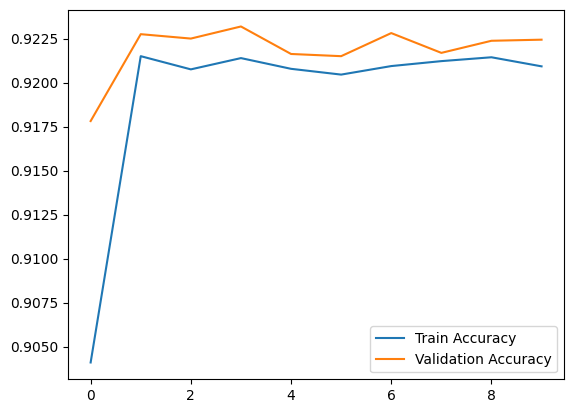

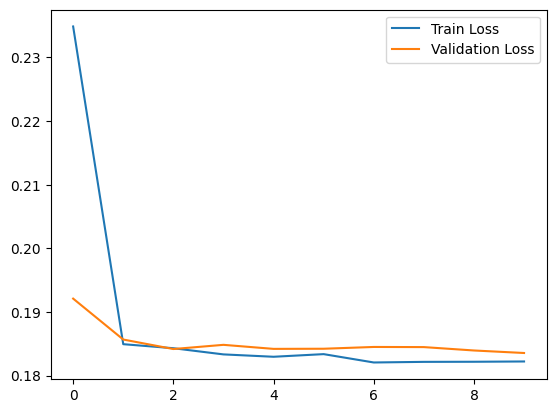

In [131]:
history_2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history_2)

In [132]:
min_val_loss_epoch_4_0 = history_2.history['val_loss'].index(min(history_2.history['val_loss']))
print("Best epoch:", min_val_loss_epoch_4_0 + 1) 

Best epoch: 10


In [133]:
recall_at_min_val_loss_4_0 = history_2.history['val_Recall'][min_val_loss_epoch_4_0]

print(f"Recall at minimal validation loss: {recall_at_min_val_loss_4_0:,.4f}")

Recall at minimal validation loss: 0.6920


In [134]:
val_accuracy_4_0 = history_2.history['val_accuracy'][min_val_loss_epoch_4_0]
accuracy_4_0 = history_2.history['accuracy'][min_val_loss_epoch_4_0]
overfitting_4_0 = abs(val_accuracy_4_0 - accuracy_4_0)

print(f"overfitting_4_0: {overfitting_4_0:,.2%}")

overfitting_4_0: 0.15%


In [135]:
#Ultimately we received the 5-factors rf model with the most influential features 
#Lets test the model efficiency
#using the same set of features and applied the random_forest classifier gives us the next results: 
share_of_default_loans_model_4_0_qty = share_fo_default_loans_in_qty * (1-recall_at_min_val_loss_4_0)
total_default_loans_sum_model_4_0 = share_of_default_loans_model_4_0_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_4_0 = share_of_default_loans_model_4_0_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_4_0 = 0.6*(total_default_loans_sum_model_4_0 + total_default_int_sum_model_4_0)
total_ebitda_4_0 = total_int_if_repaid - total_losses_from_defaults_4_0
ebitda_margin_4_0 = total_ebitda_4_0/total_int_if_repaid
incremental_ebitda_4_0 = total_ebitda_4_0 - total_ebitda


print(f"share_of_default_loans_4_0_qty:  {share_of_default_loans_model_4_0_qty:,.2%} ")
print(f"ebitda_margin_4_0:  {ebitda_margin_4_0:,.2%} ")
print(f"incremental_ebitda_4_0:  {incremental_ebitda_4_0/1000000:,.2f}M ")


share_of_default_loans_4_0_qty:  3.81% 
ebitda_margin_4_0:  93.28% 
incremental_ebitda_4_0:  139.78M 


In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import regularizers

# Initialize the model
model = Sequential()

# Define the input layer
model.add(Input(shape=(X_scaled_df_numeric.shape[1],)))

# First hidden layer with L2 regularization and Dropout
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))  # Dropout with a rate of 0.2 (20%)

# Optional hidden layers with regularization (commented out here but can be included)
# model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))

# Another hidden layer with L2 regularization and Dropout
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

# Smaller layer with L2 regularization
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',                  # guiding it to improve at its task
    loss='binary_crossentropy',         # measures mistakes for optimization
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7643 - Precision: 0.4299 - Recall: 0.0553 - accuracy: 0.8728 - loss: 0.3585 - val_AUC: 0.9375 - val_Precision: 0.7427 - val_Recall: 0.5627 - val_accuracy: 0.9193 - val_loss: 0.2271
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9292 - Precision: 0.7014 - Recall: 0.5781 - accuracy: 0.9192 - loss: 0.2262 - val_AUC: 0.9421 - val_Precision: 0.7420 - val_Recall: 0.5593 - val_accuracy: 0.9189 - val_loss: 0.2147
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9333 - Precision: 0.6911 - Recall: 0.6327 - accuracy: 0.9196 - loss: 0.2159 - val_AUC: 0.9421 - val_Precision: 0.7080 - val_Recall: 0.6592 - val_accuracy: 0.9218 - val_loss: 0.2066
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9383 - Precision: 0.6943 - Recall: 0.6587 - accuracy: 0.9235 - loss: 0.2046 - val_AUC: 0.9427 - val_Precision: 0.6923 - val_Recall: 0.6998 - val_accuracy: 0.9220 - val_loss: 0.2035
Epoch 5/10
2000/2000 ━━━

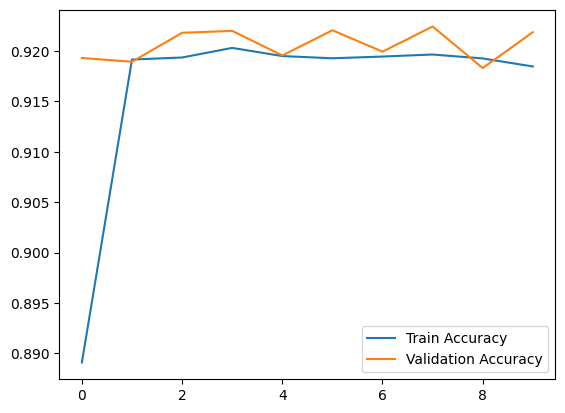

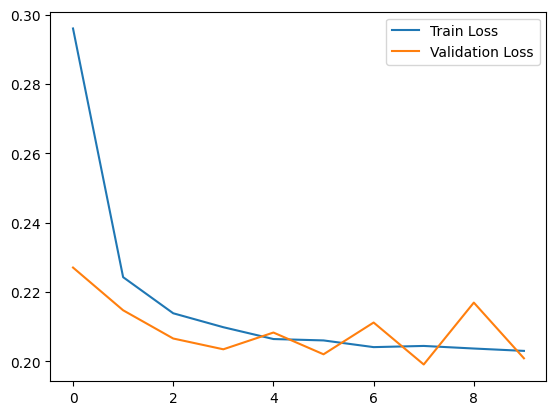

In [137]:
history_3 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history_3)

In [138]:
min_val_loss_epoch_4_1 = history_3.history['val_loss'].index(min(history_3.history['val_loss']))
print("Best epoch:", min_val_loss_epoch_4_1 + 1) 

Best epoch: 8


In [139]:
recall_at_min_val_loss_4_1 = history_3.history['val_Recall'][min_val_loss_epoch_4_1]

print(f"Recall at minimal validation loss: {recall_at_min_val_loss_4_1:,.4f}")

Recall at minimal validation loss: 0.7081


In [140]:
val_accuracy_4_1 = history_3.history['val_accuracy'][min_val_loss_epoch_4_1]
accuracy_4_1 = history_3.history['accuracy'][min_val_loss_epoch_4_1]
overfitting_4_1 = (val_accuracy_4_1 - accuracy_4_1)

print(f"overfitting_4_1: {overfitting_4_1:,.4%}")

overfitting_4_1: 0.2781%


In [141]:
#Ultimately we received the 5-factors rf model with the most influential features 
#Lets test the model efficiency
#using the same set of features and applied the random_forest classifier gives us the next results: 
share_of_default_loans_model_4_1_qty = share_fo_default_loans_in_qty * (1-recall_at_min_val_loss_4_1)
total_default_loans_sum_model_4_1 = share_of_default_loans_model_4_1_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_4_1 = share_of_default_loans_model_4_1_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_4_1 = 0.6*(total_default_loans_sum_model_4_1 + total_default_int_sum_model_4_1)
total_ebitda_4_1 = total_int_if_repaid - total_losses_from_defaults_4_1
ebitda_margin_4_1 = total_ebitda_4_1/total_int_if_repaid
incremental_ebitda_4_1 = total_ebitda_4_1 - total_ebitda


print(f"share_of_default_loans_4_1_qty:  {share_of_default_loans_model_4_1_qty:,.2%} ")
print(f"ebitda_margin_4_1:  {ebitda_margin_4_1:,.2%} ")
print(f"incremental_ebitda_4_1:  {incremental_ebitda_4_1/1000000:,.2f}M ")


share_of_default_loans_4_1_qty:  3.61% 
ebitda_margin_4_1:  93.63% 
incremental_ebitda_4_1:  142.55M 


In [142]:
#lets apply early stopping technique 

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',            # or 'val_accuracy' for classification
    patience=5,                    # number of epochs to wait for improvement before stopping
    restore_best_weights=True      # restores weights from the best epoch
)


# Initialize the model
model = Sequential()

# Define the input layer
model.add(Input(shape=(X_scaled_df_numeric.shape[1],)))

# First hidden layer with L2 regularization and Dropout
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))  # Dropout with a rate of 0.2 (20%)

# Optional hidden layers with regularization (commented out here but can be included)
# model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))

# Another hidden layer with L2 regularization and Dropout
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))

# Smaller layer with L2 regularization
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',                  # guiding it to improve at its task
    loss='binary_crossentropy',         # measures mistakes for optimization
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7384 - Precision: 0.4112 - Recall: 0.0566 - accuracy: 0.8780 - loss: 0.3640 - val_AUC: 0.9405 - val_Precision: 0.7357 - val_Recall: 0.5808 - val_accuracy: 0.9199 - val_loss: 0.2185
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9272 - Precision: 0.6865 - Recall: 0.5908 - accuracy: 0.9171 - loss: 0.2242 - val_AUC: 0.9426 - val_Precision: 0.7514 - val_Recall: 0.5387 - val_accuracy: 0.9184 - val_loss: 0.2175
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9337 - Precision: 0.6689 - Recall: 0.6090 - accuracy: 0.9143 - loss: 0.2141 - val_AUC: 0.9429 - val_Precision: 0.7137 - val_Recall: 0.6616 - val_accuracy: 0.9229 - val_loss: 0.2028
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9373 - Precision: 0.6864 - Recall: 0.6421 - accuracy: 0.9191 - loss: 0.2065 - val_AUC: 0.9438 - val_Precision: 0.7204 - val_Recall: 0.6298 - val_accuracy: 0.9216 - val_loss: 0.2030
Epoch 5/10
2000/2000 ━━━

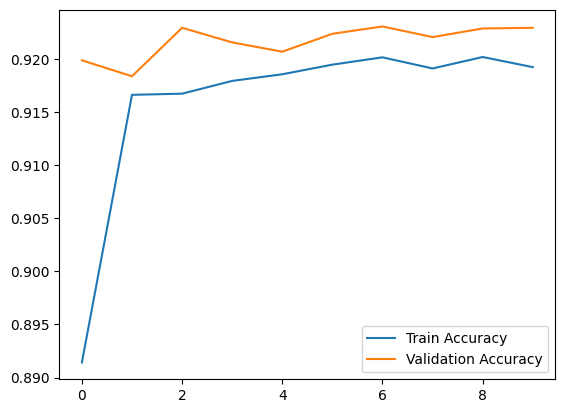

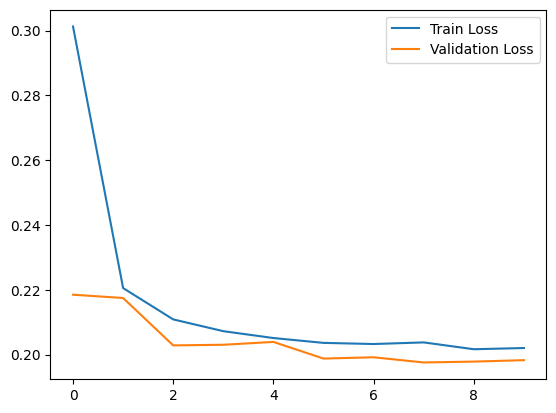

In [144]:
history_4 = model.fit(X_train, y_train, epochs=10,callbacks=[early_stopping], batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history_4)

In [145]:
min_val_loss_epoch_5 = history_4.history['val_loss'].index(min(history_4.history['val_loss']))
print("Best epoch:", min_val_loss_epoch_5 + 1) 

Best epoch: 8


In [146]:
recall_at_min_val_loss_5 = history_4.history['val_Recall'][min_val_loss_epoch_5]

print(f"Recall at minimal validation loss: {recall_at_min_val_loss_5:,.4f}")

Recall at minimal validation loss: 0.7125


In [147]:
val_accuracy_5 = history_4.history['val_accuracy'][min_val_loss_epoch_5]
accuracy_5 = history_4.history['accuracy'][min_val_loss_epoch_5]
overfitting_5 = abs(val_accuracy_5 - accuracy_5)

print(f"overfitting_5: {overfitting_5:,.4%}")


overfitting_5: 0.2953%


In [148]:
#Ultimately we received the 5-factors rf model with the most influential features 
#Lets test the model efficiency
#using the same set of features and applied the random_forest classifier gives us the next results: 
share_of_default_loans_model_5_qty = share_fo_default_loans_in_qty * (1-recall_at_min_val_loss_5)
total_default_loans_sum_model_5 = share_of_default_loans_model_5_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_5 = share_of_default_loans_model_5_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_5 = 0.6*(total_default_loans_sum_model_5 + total_default_int_sum_model_5)
total_ebitda_5 = total_int_if_repaid - total_losses_from_defaults_5
ebitda_margin_5 = total_ebitda_5/total_int_if_repaid
incremental_ebitda_5 = total_ebitda_5 - total_ebitda


print(f"share_of_default_loans_5_qty:  {share_of_default_loans_model_5_qty:,.2%} ")
print(f"ebitda_margin_5:  {ebitda_margin_5:,.2%} ")
print(f"incremental_ebitda_5:  {incremental_ebitda_5/1000000:,.2f}M ")

share_of_default_loans_5_qty:  3.56% 
ebitda_margin_5:  93.73% 
incremental_ebitda_5:  143.30M 


In [149]:
#Summary table with models outputs:
#Let use the following abbreviations:
# Baseline = Model_0
# Logistic_regression with mannually chosen parameters = Model_1
# Randomforestclassifier with Model_1 features = Model_2
# Randomforestclassifier with own-chosen features = Model_3
# Tensorflow with Model_1 features = Model_4
# Tensorflow with Model_3 features = Model_5
# Tensorflow as Model_5 with generalisation in architecture = Model_6
# Tensorflow as Model_5 with early stopping in architecture = Model_7


summary_table = {
    'Model_type': ['Model_0', 'Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5', 'Model_6','Model_7'],
    '%_default_loans': [share_fo_default_loans_in_qty, share_of_default_loans_model_1_qty,share_of_default_loans_model_2_qty, share_of_default_loans_model_3_qty,
                              share_of_default_loans_model_4_qty,share_of_default_loans_model_4_0_qty,share_of_default_loans_model_4_1_qty,share_of_default_loans_model_5_qty],
    '%_ebitda_margin': [ebitda_margin, ebitda_margin_1, ebitda_margin_2,ebitda_margin_3, ebitda_margin_4,ebitda_margin_4_0, ebitda_margin_4_1,ebitda_margin_5],
    'incremental_ebitda,M' :[0, incremental_ebitda_1, incremental_ebitda_2, incremental_ebitda_3, incremental_ebitda_4,incremental_ebitda_4_0,incremental_ebitda_4_1, incremental_ebitda_5],
    '%_overfitting': [0, overfitting_1, overfitting_2, overfitting_3, overfitting_4, overfitting_4_0, overfitting_4_1, overfitting_5]
}
table = pd.DataFrame(summary_table)
table['incremental_ebitda,M'] = table['incremental_ebitda,M'].astype(float)/1000000
table['incremental_ebitda,M']
table['%_default_loans'] =table['%_default_loans']*100
table['%_ebitda_margin'] =table['%_ebitda_margin']*100
table['%_overfitting'] =(table['%_overfitting']*100).round(2)

pd.set_option('display.width', 1000)
print(table)

  Model_type  %_default_loans  %_ebitda_margin  incremental_ebitda,M  %_overfitting
0    Model_0            12.38            75.47                  0.00           0.00
1    Model_1             4.82            91.51                125.87           0.32
2    Model_2             4.67            91.77                127.91           8.18
3    Model_3             4.65            91.81                128.26           7.48
4    Model_4             4.52            92.04                130.04           0.09
5    Model_5             3.81            93.28                139.78           0.15
6    Model_6             3.61            93.63                142.55           0.28
7    Model_7             3.56            93.73                143.30           0.30


In [150]:
#df.to_csv('/Users/Andriy.Bespalyy/Desktop/data_sc/the_project/, df.csv', index=False)

In [151]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#df.reset_index(drop=True)
data_for_clustering = df[['last_fico_range_low','last_fico_range_high','annual_inc_capped', 'dti_capped', 'loan_amnt_capped',
'int_rate_clean_capped','verification_status', 'loan_default']].dropna()

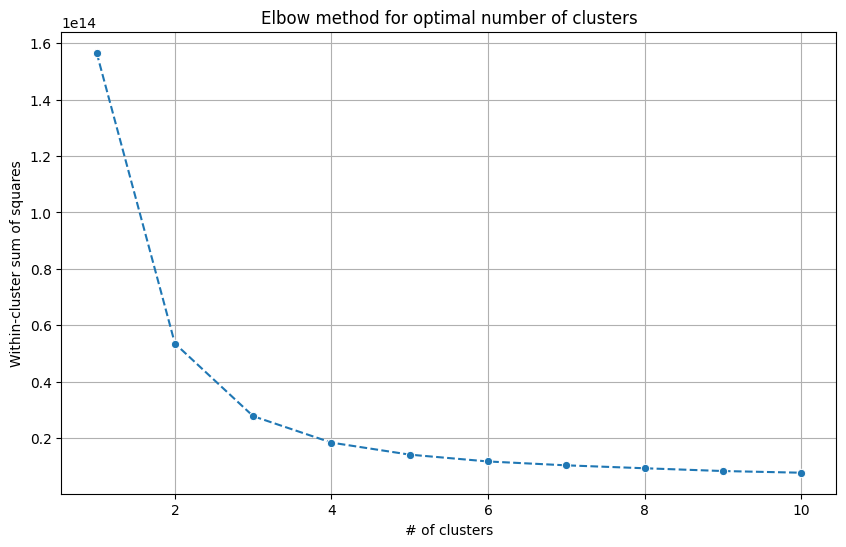

In [152]:
wcss = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

# Elbow Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, max_clusters + 1), y=wcss, marker='o', linestyle='--')
plt.xlabel('# of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow method for optimal number of clusters')
plt.grid(True)
plt.show()

As we see from the graph, the elbow steep decline ends at circa 3 clusters

In [153]:
num_clusters = 3

In [154]:
# Applying K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_for_clustering['cluster-km'] = kmeans.fit_predict(data_for_clustering)
data_for_clustering.head()

last_fico_range_low  last_fico_range_high  annual_inc_capped  dti_capped  loan_amnt_capped  int_rate_clean_capped  verification_status  loan_default  cluster-km
0               665.00                669.00           48000.00       20.25           4000.00                   0.13                    1         False           0
1               700.00                704.00           57000.00       25.33          24000.00                   0.09                    1         False           0
2               785.00                789.00           55000.00        7.22           5000.00                   0.10                    0         False           0
3               745.00                749.00           43500.00       24.55          24000.00                   0.11                    0         False           0
4               775.00                779.00           48000.00       24.30          14000.00                   0.14                    1         False           0

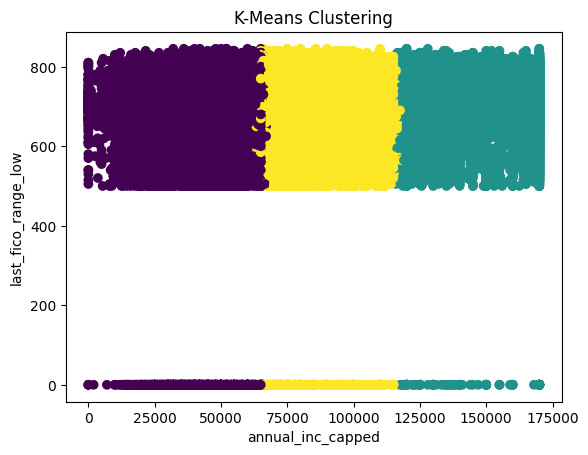

In [155]:
# Visualize the clusters
plt.scatter(data_for_clustering['annual_inc_capped'], data_for_clustering['last_fico_range_low'], c=data_for_clustering['cluster-km'], cmap='viridis')
plt.xlabel('annual_inc_capped')
plt.ylabel('last_fico_range_low')
plt.title('K-Means Clustering')
plt.show()

In [156]:
# Provide key Statistics by cluster
cluster_summary = data_for_clustering\
    .groupby('cluster-km').agg(['mean', 'median', 'std', 'min', 'max'])
print("Key stats by cluster:")

# Set float format to display with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

cluster_summary

Key stats by cluster:


last_fico_range_low                           last_fico_range_high                          annual_inc_capped                                        dti_capped                         loan_amnt_capped                                   int_rate_clean_capped                       verification_status                     loan_default                         
                          mean median    std  min    max                 mean median   std  min    max              mean    median      std       min       max       mean median  std   min   max             mean   median     std     min      max                  mean median  std  min  max                mean median  std min max         mean median  std    min   max
cluster-km                                                                                                                                                                                                                                                                                                                                                                     
0                       668.48 695.00 127.54 0.00 845.00               684.43 699.00 77.88 0.00 850.00          45494.91  47000.00 13086.09      0.00  67500.00      19.95  19.87 8.90  0.00 34.75         11384.01 10000.00 6809.54  700.00 35000.00                  0.13   0.13 0.04 0.05 0.22                0.63   1.00 0.48   0   1         0.14   0.00 0.35  False  True
1                       692.31 705.00  92.30 0.00 845.00               700.70 709.00 67.77 0.00 850.00         147668.49 150000.00 19691.13 115942.00 170000.00      15.21  14.45 7.64  0.00 34.75         22248.69 22500.00 9839.48 1000.00 35000.00                  0.12   0.11 0.05 0.05 0.22                0.68   1.00 0.47   0   1         0.09   0.00 0.28  False  True
2                       684.18 700.00 104.33 0.00 845.00               694.53 704.00 72.80 0.00 850.00          86145.70  85000.00 13770.61  63000.00 118000.00      18.15  17.61 8.20 -1.00 34.75         17515.84 16000.00 9174.54 1000.00 35000.00                  0.13   0.12 0.05 0.05 0.22                0.63   1.00 0.48   0   1         0.12   0.00 0.32  False  True

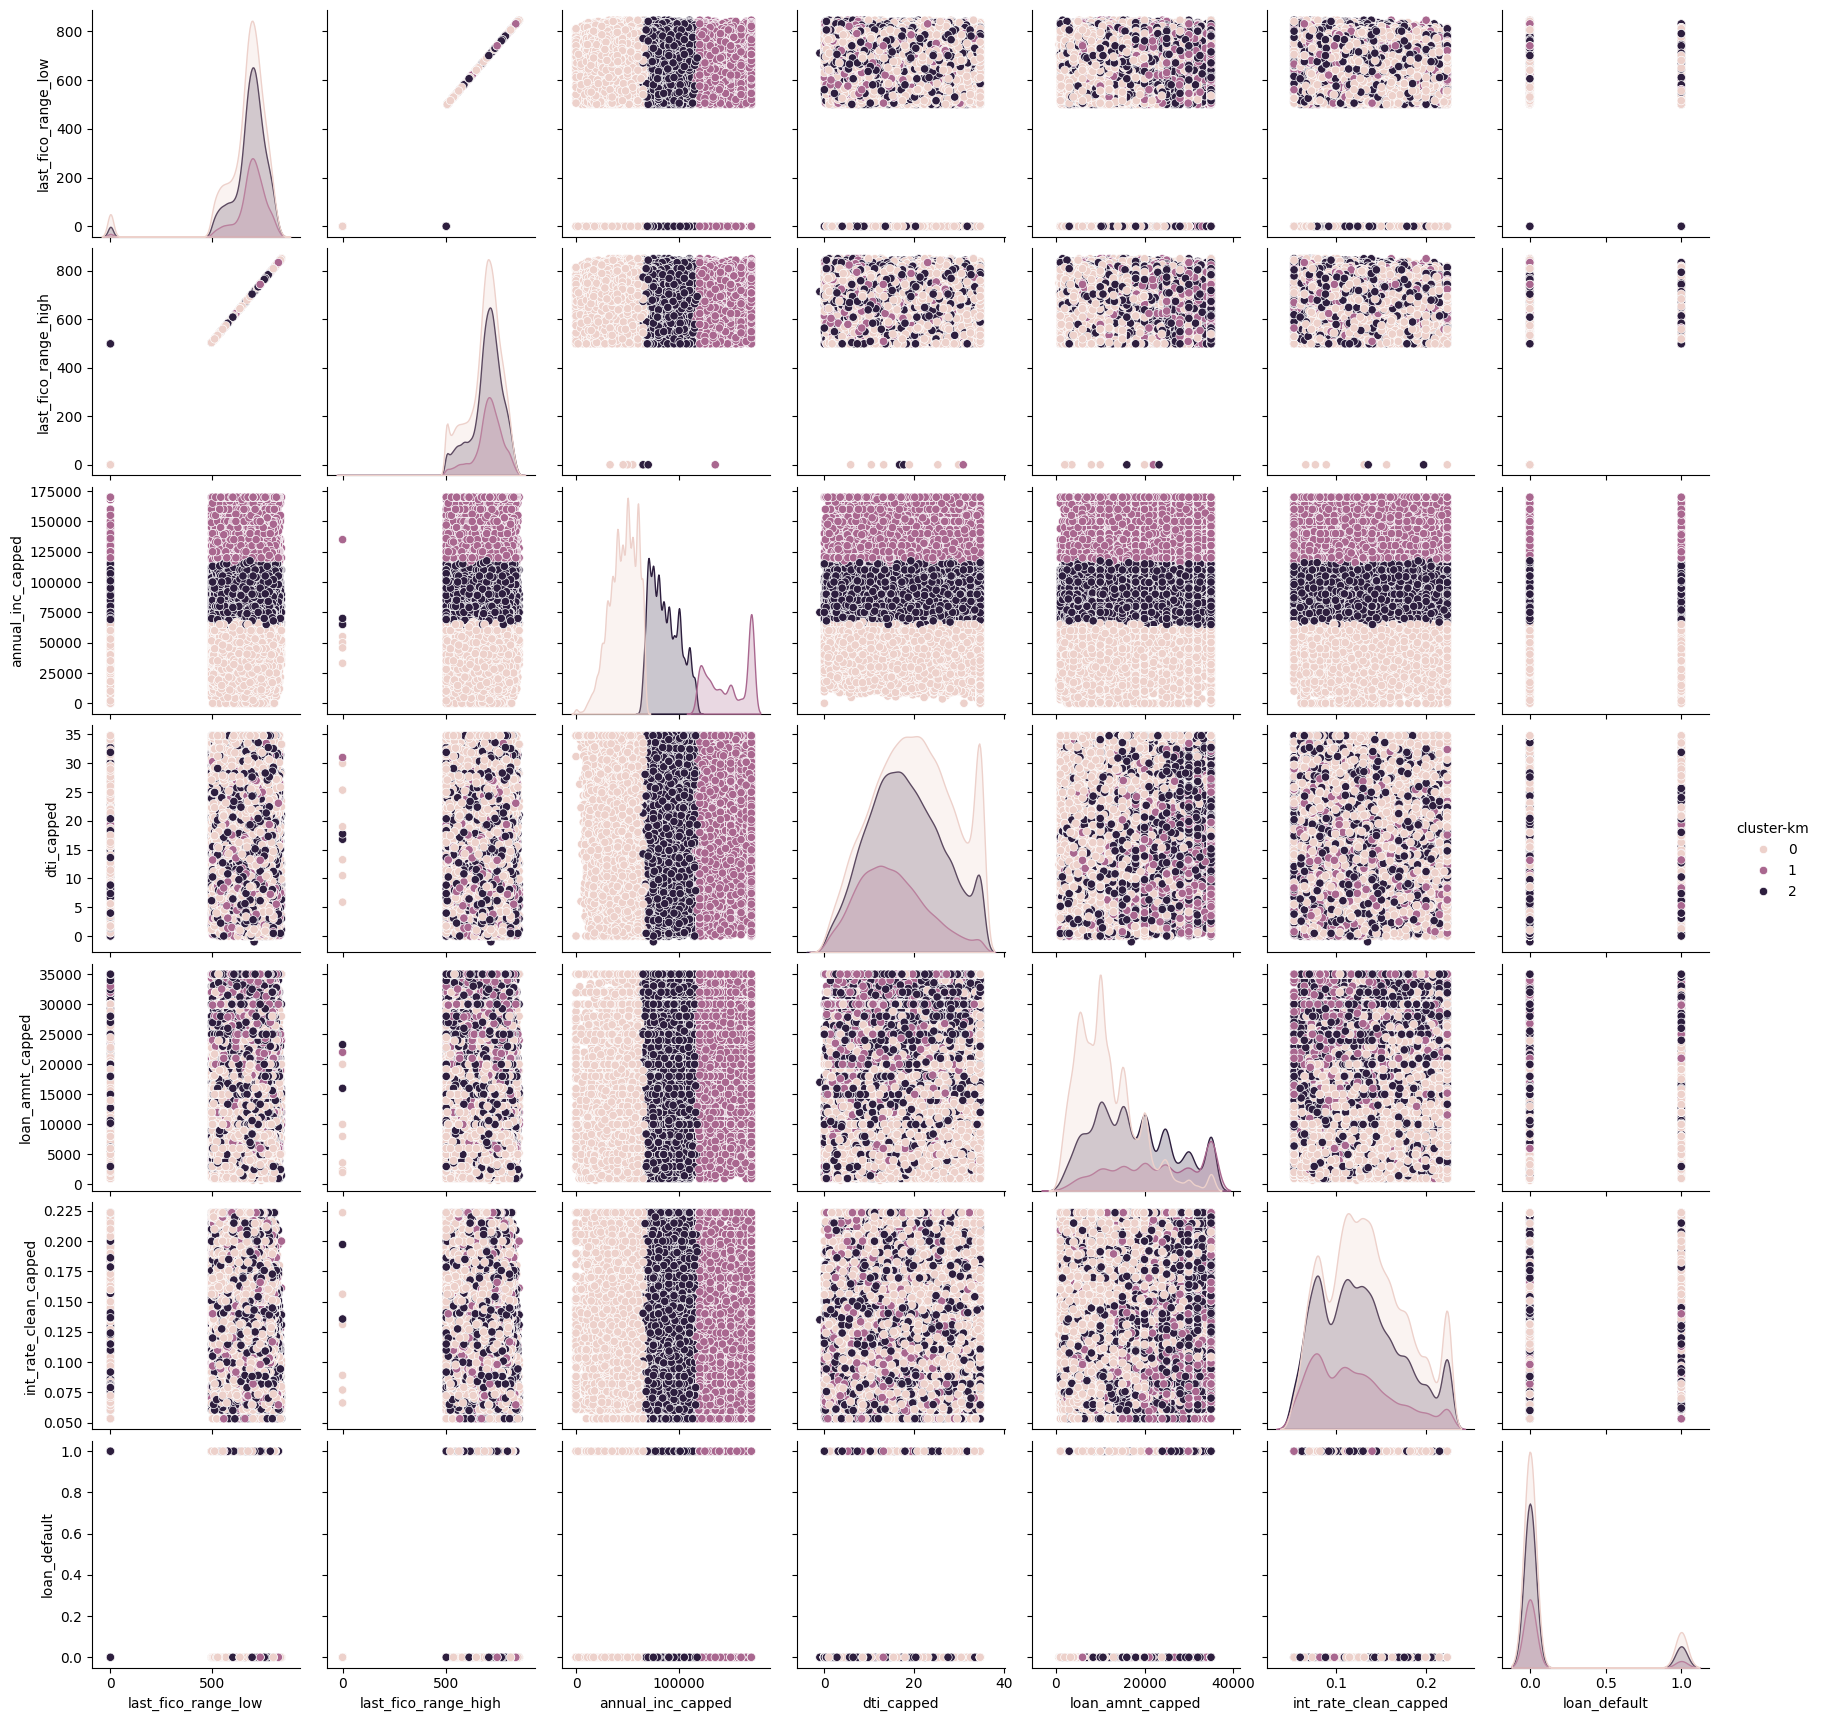

In [157]:
sns.pairplot(data_for_clustering[['last_fico_range_low','last_fico_range_high','annual_inc_capped', 'dti_capped', 'loan_amnt_capped',
'int_rate_clean_capped', 'loan_default','cluster-km']]
             ,hue = 'cluster-km')
plt.show()

In [158]:
#Lets add annual_inc_segments to our chosen model, and test the results vs the chosen one without segmentation
df_numeric['income_segment'] = pd.cut(df_numeric['annual_inc_capped'], bins=[0, 67500, 118000, 170000], 
                                 labels=['Low', 'Medium', 'High'])

# Convert the segment into numerical format
df_numeric['income_segment'] = df_numeric['income_segment'].astype('category').cat.codes

df_numeric['income_segment_low'] = df_numeric.income_segment == 0

In [159]:
df_numeric['income_segment'].value_counts()

income_segment
 0    50782
 1    34227
 2    14891
-1      100
Name: count, dtype: int64

In [160]:
features = ['last_fico_range_high', 'last_fico_range_low', 'loan_amnt_capped',
       'int_rate_clean_capped', 'annual_inc_capped','income_segment_low']

X = df_numeric[features]
y = df_numeric['loan_default']

In [161]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling (alternative: StandardScaler for z-score normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with same column names
X_scaled_df_numeric = pd.DataFrame(X_scaled, columns=features)
X_scaled_df_numeric.head()

last_fico_range_high  last_fico_range_low  loan_amnt_capped  int_rate_clean_capped  annual_inc_capped  income_segment_low
0                  0.79                 0.79              0.10                   0.46               0.28                1.00
1                  0.83                 0.83              0.68                   0.23               0.34                1.00
2                  0.93                 0.93              0.13                   0.30               0.32                1.00
3                  0.88                 0.88              0.68                   0.34               0.26                1.00
4                  0.92                 0.92              0.39                   0.49               0.28                1.00

In [162]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df_numeric, y, test_size=0.2, random_state=42)


In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize the model (empty initially)
model = Sequential()

# Define the input layer
model.add(Input(shape=(X_scaled_df_numeric.shape[1],)))

# Adding layers to our model, which are like different parts of the brain.
# Each layer has "neurons" (like tiny decision-makers)

# First hidden layer
model.add(Dense(32, activation='relu'))

# Optional hidden layers
# model.add(Dense(32, activation='relu'))

# Another hidden layer
model.add(Dense(16, activation='relu'))

# Smaller brain part that processes what the first layer has figured out
model.add(Dense(8, activation='relu'))

# Output layer, like the brain's decision-making part
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',  # guiding it to improve at its task
    loss='binary_crossentropy',  # measures mistakes for optimization
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8167 - Precision: 0.7157 - Recall: 0.1881 - accuracy: 0.8928 - loss: 0.2993 - val_AUC: 0.9380 - val_Precision: 0.7329 - val_Recall: 0.5147 - val_accuracy: 0.9141 - val_loss: 0.1981
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9429 - Precision: 0.7062 - Recall: 0.6140 - accuracy: 0.9210 - loss: 0.1864 - val_AUC: 0.9421 - val_Precision: 0.7403 - val_Recall: 0.5597 - val_accuracy: 0.9187 - val_loss: 0.1941
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9418 - Precision: 0.6913 - Recall: 0.6400 - accuracy: 0.9195 - loss: 0.1877 - val_AUC: 0.9412 - val_Precision: 0.7349 - val_Recall: 0.5852 - val_accuracy: 0.9201 - val_loss: 0.1895
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9442 - Precision: 0.6937 - Recall: 0.6579 - accuracy: 0.9210 - loss: 0.1837 - val_AUC: 0.9432 - val_Precision: 0.6951 - val_Recall: 0.6866 - val_accuracy: 0.9216 - val_loss: 0.1855
Epoch 5/10
2000/2000 ━━━

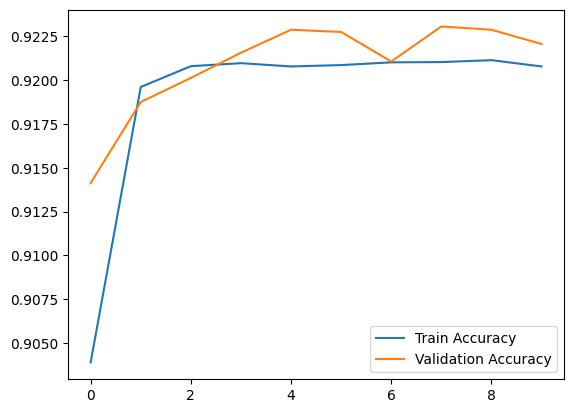

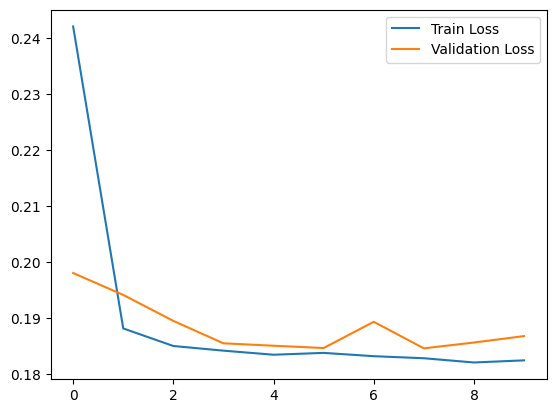

In [164]:
history_2_1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history_2_1)

In [165]:
min_val_loss_epoch_4_0_1 = history_2_1.history['val_loss'].index(min(history_2_1.history['val_loss']))
print("Best epoch:", min_val_loss_epoch_4_0_1 + 1) 

Best epoch: 8


In [166]:
recall_at_min_val_loss_4_0_1 = history_2_1.history['val_Recall'][min_val_loss_epoch_4_0_1]

print(f"Recall at minimal validation loss: {recall_at_min_val_loss_4_0_1:,.4f}")


Recall at minimal validation loss: 0.6435


In [167]:

val_accuracy_4_0_1 = history_2.history['val_accuracy'][min_val_loss_epoch_4_0_1]
accuracy_4_0_1 = history_2.history['accuracy'][min_val_loss_epoch_4_0_1]
overfitting_4_0_1 = abs(val_accuracy_4_0_1 - accuracy_4_0_1)

print(f"overfitting_4_0_1: {overfitting_4_0_1:,.2%}")

overfitting_4_0_1: 0.05%


In [168]:
#Ultimately we received the 5-factors rf model with the most influential features 
#Lets test the model efficiency
#using the same set of features and applied the random_forest classifier gives us the next results: 
share_of_default_loans_model_4_0_1_qty = share_fo_default_loans_in_qty * (1-recall_at_min_val_loss_4_0_1)
total_default_loans_sum_model_4_0_1 = share_of_default_loans_model_4_0_1_qty*average_loan*qty_of_loans_issued
total_default_int_sum_model_4_0_1 = share_of_default_loans_model_4_0_1_qty*average_int_sum*qty_of_loans_issued
total_losses_from_defaults_4_0_1 = 0.6*(total_default_loans_sum_model_4_0_1 + total_default_int_sum_model_4_0_1)
total_ebitda_4_0_1 = total_int_if_repaid - total_losses_from_defaults_4_0_1
ebitda_margin_4_0_1 = total_ebitda_4_0_1/total_int_if_repaid
incremental_ebitda_4_0_1 = total_ebitda_4_0_1 - total_ebitda


print(f"share_of_default_loans_4_0_1_qty:  {share_of_default_loans_model_4_0_1_qty:,.2%} ")
print(f"ebitda_margin_4_0_1:  {ebitda_margin_4_0_1:,.2%} ")
print(f"incremental_ebitda_4_0_1:  {incremental_ebitda_4_0_1/1000000:,.2f}M ")


share_of_default_loans_4_0_1_qty:  4.42% 
ebitda_margin_4_0_1:  92.22% 
incremental_ebitda_4_0_1:  131.47M 


In [169]:
#Lets update our models_list 
#Summary table with models outputs:
#Let use the following abbreviations:
# Baseline = Model_0
# Logistic_regression with mannually chosen parameters = Model_1
# Randomforestclassifier with Model_1 features = Model_2
# Randomforestclassifier with own-chosen features = Model_3
# Tensorflow with Model_1 features = Model_4
# Tensorflow with Model_3 features = Model_5
# Tensorflow as Model_5 with generalisation in architecture = Model_6
# Tensorflow as Model_5 with early stopping in architecture = Model_7
# Tensorflow as Model_5, enriched with segment_low feature = Model_8


summary_table = {
    'Model_type': ['Model_0', 'Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5', 'Model_6','Model_7', 'Model_8'],
    '%_default_loans': [share_fo_default_loans_in_qty, share_of_default_loans_model_1_qty,share_of_default_loans_model_2_qty, share_of_default_loans_model_3_qty,
                              share_of_default_loans_model_4_qty,share_of_default_loans_model_4_0_qty,share_of_default_loans_model_4_1_qty,share_of_default_loans_model_5_qty,
                       share_of_default_loans_model_4_0_1_qty],
    '%_ebitda_margin': [ebitda_margin, ebitda_margin_1, ebitda_margin_2,ebitda_margin_3, ebitda_margin_4,ebitda_margin_4_0, ebitda_margin_4_1,ebitda_margin_5,ebitda_margin_4_0_1],
    'incremental_ebitda,M' :[0, incremental_ebitda_1, incremental_ebitda_2, incremental_ebitda_3, incremental_ebitda_4,incremental_ebitda_4_0,incremental_ebitda_4_1, 
                             incremental_ebitda_5,incremental_ebitda_4_0_1],
    '%_overfitting': [0, overfitting_1, overfitting_2, overfitting_3, overfitting_4, overfitting_4_0, overfitting_4_1, overfitting_5, overfitting_4_0_1]
}
table = pd.DataFrame(summary_table)
table['incremental_ebitda,M'] = table['incremental_ebitda,M'].astype(float)/1000000
table['incremental_ebitda,M']
table['%_default_loans'] =table['%_default_loans']*100
table['%_ebitda_margin'] =table['%_ebitda_margin']*100
table['%_overfitting'] =(table['%_overfitting']*100).round(2)

pd.set_option('display.width', 1000)
#lets assign x10 weight to overfitting parameter (instead of dividing by 100, we will divide it by 10) 
table['increment_vs_overfit'] = table['%_ebitda_margin']*(1-table['%_overfitting']/10)
def highlight_row(x):
    # Condition: Highlight rows where income is 45000
    condition = x['increment_vs_overfit'] >= 91
    # Style applied: 'background-color: yellow'
    return ['background-color: yellow' if condition else '' for _ in x]

styled_table = table.style.apply(highlight_row, axis=1)    


styled_table



As we see from the results of last model, after adding the segment_low feature, we managed to slightly improve the recall_rate, while keeping the overfitting under control (Model_8 vs Model_5 comparison) 

As a result of conducting modelling exercises were built and tested 8 different models, consisting of:
1 Logistic regression model with manually chosen features, based on preliminary analysis, 
2 RFE models, with both manual and un-supervised features selections 
5 Tensorflow models with different architecture variations, such as generalisation tuning, early stopping and segmentation feature enriching 

The best performing model was chosen by the max EBITDA_margin ratio, adjusted by overfitting ratio. 
After making several iterations of testing the Model 4 and the Model 8 proved to be the best performing ones in the contest.

  Given almost the same results I would prefer the Model 8 because of the following reasons:
pros:
- the model takes into account the income_segment which proves to show the higher default rates than others;
- the model takes a decision, based on crucial factors for any loan: loan_amount, interest_rate, credit_rating, while dti ratio as relative value may have less accuracy and not take into account the scale of the deal;
- the model shows high accuracy level, low overfitting, and high accuracy, AUC;
what can be improved:
- the model didnt select the verification_status feature, while the pre-analysis indicates strong influence of the factor and correlation with loan_quality;
- as seen from the picture with first brief look at dataset picure, the model also didnt include the home_ownership_rent factor so it could be also useful for our modelling purposes;
- the model did not consider the type of loan as well, for example card_loans may have the way different deliquincy ratio vs mortgage;
cons:
- the deployment of tensorflow model may require substantial resources in order to deal with the way bigger datasets;

Considerations on deployment and scalability of the solution.
In order to evaluate the scalabilty of the solution one needs to understand the scale of daily transactions, hence the size of data to be processed.
Then, depending on the evaluation, the TCO and project_map of implementation to be created. 
The deployment may be done as MVP, in order to test it in practice on the small size of businees (for instance in the format of A|B testing) or as part of bigger transformation project within the bank. 

Here is the light-level shcema of proposed solution in BAU usage (showed via customer journey): 

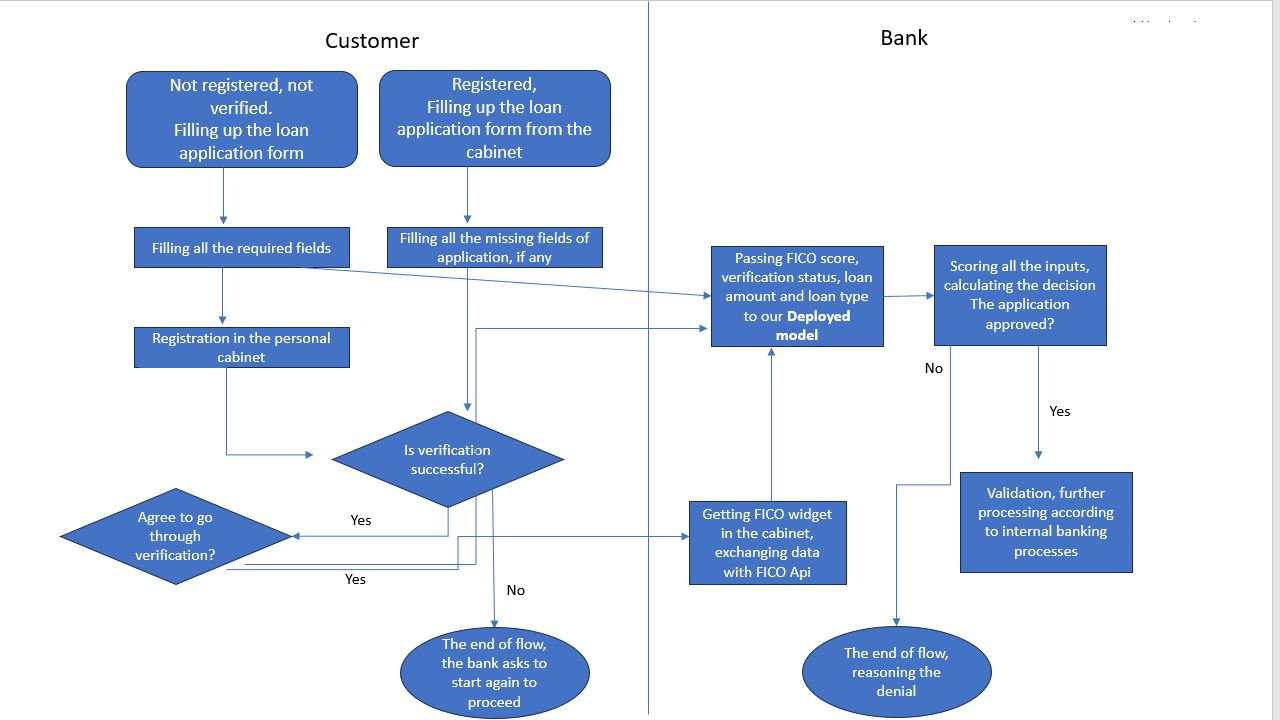

In [170]:
image = Image.open("/Users/Andriy.Bespalyy/Desktop/data_sc/the_project/schema.jpg")
display(image)

So, what is estimated financial impact of the project? 
Given, we dont know the cost TCO of the project implementation, we may estimate the effect of model application on the supposed incremental revenue:
that is by around 130 mUSD per the full lifetime of credit portfolio, the share of bad_debt loans to decrease from 12.3 to around 4%, the EBITDA margin to increase from 75 to 92% minus the costs, needed for the project implementation. 

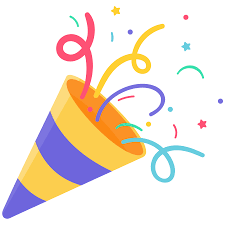

In [172]:
#Although I could not attend the live lessons, the whole program was impressive, challenging and inspiring! 
#Thank You,  Andrea, Federico and Jordan for such a great opportunity to get closer to the world of ML&AI :) 
image = Image.open("/Users/Andriy.Bespalyy/Desktop/data_sc/the_project/celebrate.png")
display(image)